# readme
descrip: plot SSH, steric height and AMOC Time Series for Sunway TR (transient) runs <br>

update history: <br>
v1.0 DL 2021Feb06 <br>
v1.1 DL 2021Mar03 <br>
v1.2 DL 2021Apr24 <br>
v1.3 DL 2021May06 make publication-ready pics <br>
v1.4 DL 2021May20 combine TR run results into one fig (for main text) and control run results into one fig (support info) <br>
 
extra notes: <br>
I used xoak to select cities from POP grids following https://pop-tools.readthedocs.io/en/latest/examples/xoak-example.html <br>
There is memory issue if use large data set files with xoak. I first use xoak with t12 and g16 grid files to get index for cities then select index for large data set files. 

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
# import cartopy.crs as ccrs
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xoak
# import xesmf as xe

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
client = Client("tcp://10.73.3.113:36498")
client

<Client: 'tcp://10.73.3.113:36498' processes=10 threads=10, memory=210.00 GB>

# define parameters

In [3]:
chunks_HR = {'nlat':400,'nlon':300}
chunks_LR = {'nlat':384,'nlon':320}

# === AMOC files ===
# --- TH (transient HR) ---
infile_MOC_TH = ('/scratch/group/ihesp/archive/Sunway_Runs/HR_HF_TNST/'
'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.MOC.185001.210012.nc')
# -------------------------

# --- TL (transient LR) ---
infile_MOC_TL = ('/scratch/group/ihesp/archive/Sunway_Runs/'
'LR_HF_TNST/B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.MOC.185001.210012.nc')
# -------------------------
# ==================

# === POP grids files ===
infile0_g16 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
infile0_t12 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
# =======================

outdir='/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir + 'SSHAMOCStericHeightTimeSeriesSunwayTR_2021May20.png'

# read data files
read MOC files

In [4]:
ds_MOC_TL = xr.open_dataset(infile_MOC_TL)
time_s_TL = ds_MOC_TL.time.to_pandas().index.shift(-1,'M')  # convert FOSI time (model year) to actual year
ds_MOC_TL = ds_MOC_TL.assign_coords(time=time_s_TL)
ds_MOC_TL

<xarray.Dataset>
Dimensions:         (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, time: 3012, transport_reg: 2)
Coordinates:
  * time            (time) object 1850-01-31 00:00:00 ... 2100-12-31 00:00:00
  * lat_aux_grid    (lat_aux_grid) float32 -79.49 -78.95 -78.42 ... 89.47 90.0
  * moc_z           (moc_z) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: d2, moc_comp, transport_reg
Data variables:
    time_bound      (time, d2) object ...
    moc_components  (moc_comp) |S256 ...
    MOC             (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-11 at 22:22:40.9
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  750
    tavg_sum:      2592000.0

In [5]:
ds_MOC_TH = xr.open_dataset(infile_MOC_TH)
time_s_TH = ds_MOC_TH.time.to_pandas().index.shift(-1,'M') # shift 1 mon
ds_MOC_TH = ds_MOC_TH.assign_coords(time=time_s_TH)
ds_MOC_TH

<xarray.Dataset>
Dimensions:            (lat_aux_grid: 395, moc_comp: 1, moc_z: 63, time: 3012, transport_reg: 2)
Coordinates:
  * time               (time) object 1850-01-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  (transport_reg) |S256 ...
    moc_components     (moc_comp) |S256 ...
  * moc_z              (moc_z) float32 0.0 1e+03 2e+03 ... 5.75e+05 6e+05
  * lat_aux_grid       (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
Dimensions without coordinates: moc_comp, transport_reg
Data variables:
    MOC                (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...

read SSH files

In [6]:
infile1_ssh_TH = ('/scratch/group/ihesp/archive/Sunway_Runs/HR_HF_TNST/'
              'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
ds_ssh_TH = xr.open_dataset(infile1_ssh_TH, chunks=chunks_HR)

infile1_ssh_TL = ('/scratch/group/ihesp/archive/Sunway_Runs/LR_HF_TNST/'
              'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
ds_ssh_TL = xr.open_dataset(infile1_ssh_TL,chunks=chunks_LR)
ds_ssh_TL

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 3012)
Coordinates:
  * time        (time) object 1850-01-17 12:00:00 ... 2100-12-17 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(3012, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(3012, 384, 320), meta=np.ndarray>
Attributes: (12/13)
    title:           B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:         Thu May 14 01:43:04 2020: ncra -O -v SSH /home/export/on...
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    ...              ...
    start_time:      This dataset was created on 2020-04-11 at 22:12:21.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    25
    tavg_sum:        86400.0
    tavg_sum_qflux:  86400.0
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

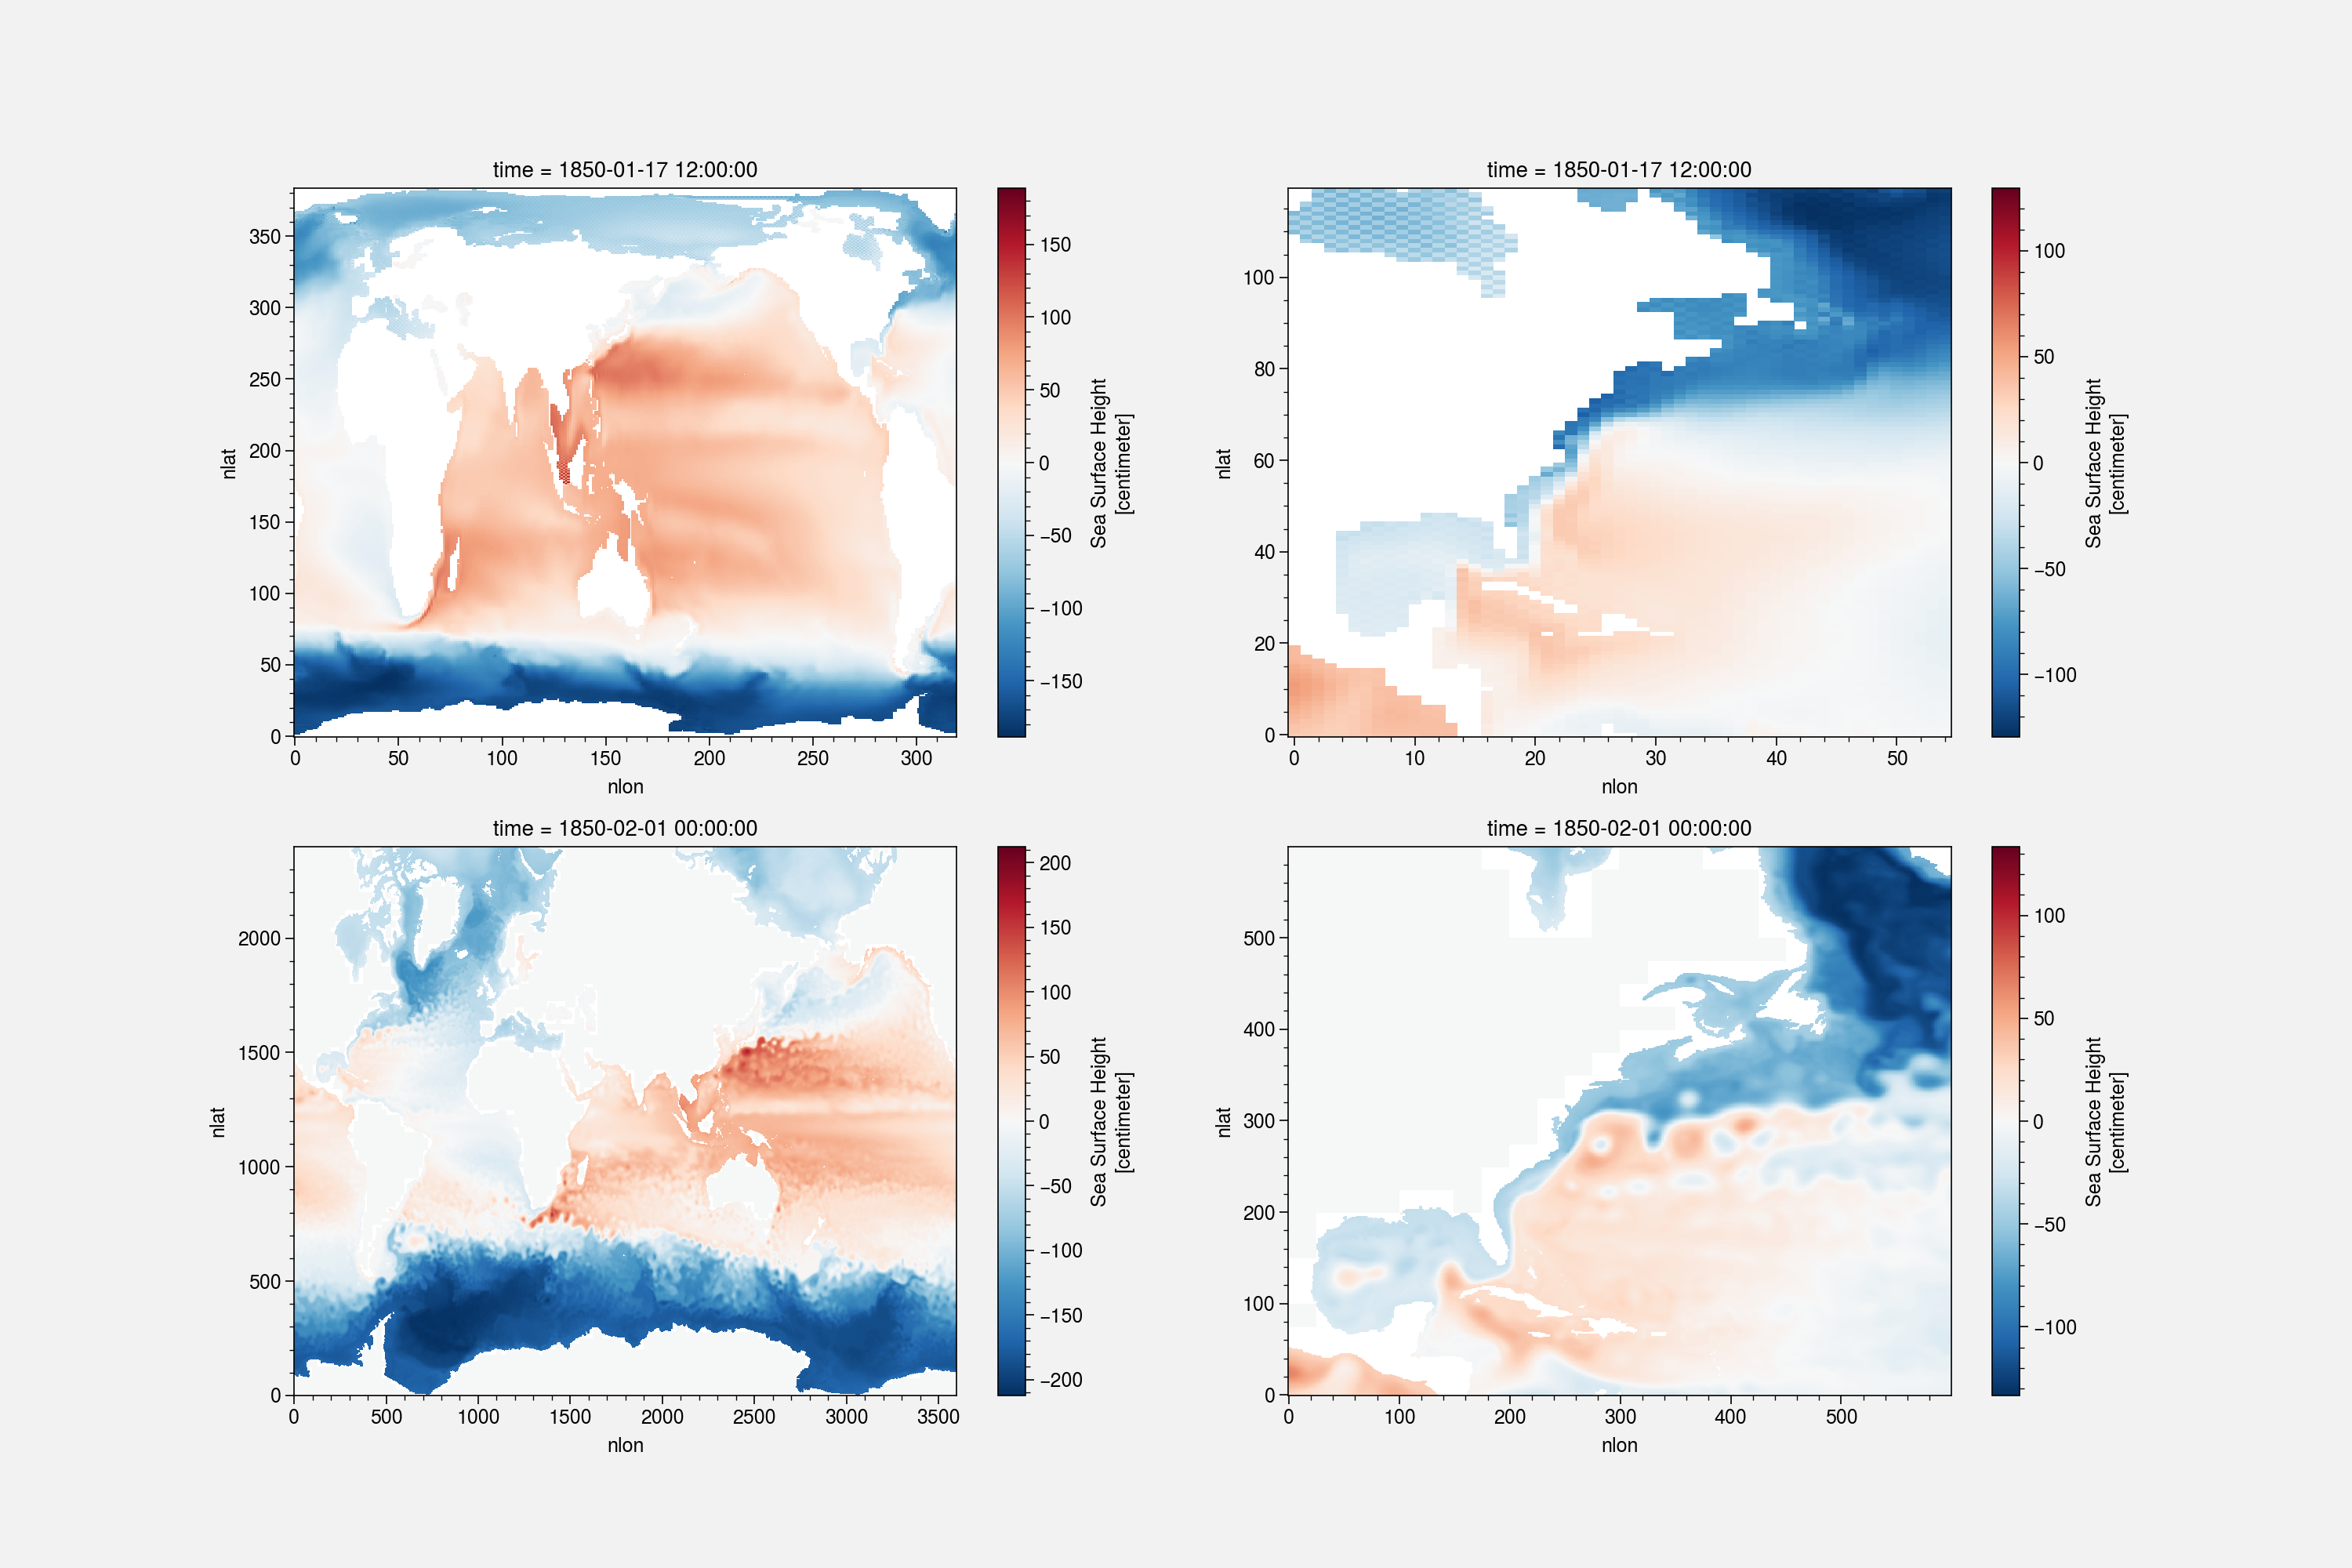

In [7]:
fig, axs = plt.subplots(2,2,figsize=(15,10))

ds_ssh_TL.SSH.isel(time=0).plot(ax=axs[0,0])
ds_ssh_TL.SSH.isel(time=0,nlon=slice(265,320),nlat=slice(230,350)).plot(ax=axs[0,1])
ds_ssh_TH.SSH.isel(time=0).plot(ax=axs[1,0])
ds_ssh_TH.SSH.isel(time=0,nlon=slice(100,700),nlat=slice(1300,1900)).plot(ax=axs[1,1])

In [8]:
ds_ssh_TH.SSH.isel(nlon=slice(100,700),nlat=slice(1300,1900))

<xarray.DataArray 'SSH' (time: 3012, nlat: 600, nlon: 600)>
dask.array<getitem, shape=(3012, 600, 600), dtype=float32, chunksize=(3012, 300, 300), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-02-01 00:00:00 ... 2100-12-17 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(300, 200), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(300, 200), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Sea Surface Height
    units:         centimeter
    grid_loc:      2110
    cell_methods:  time: mean

In [9]:
ssh_yr_TH = ds_ssh_TH.SSH.isel(nlon=slice(100,700),nlat=slice(1300,1900)).resample(time='A').mean('time').compute()
ssh_yr_TL = ds_ssh_TL.SSH.isel(nlon=slice(265,320),nlat=slice(230,350)).resample(time='A').mean('time').compute()

In [10]:
MOC45_yr_TL = (ds_MOC_TL.MOC.sel(lat_aux_grid=45, moc_z=1000*100,
    method='nearest').sel(moc_comp=0, transport_reg=1).resample(time='A').mean('time'))
MOC45_yr_TH = (ds_MOC_TH.MOC.sel(lat_aux_grid=45, moc_z=1000*100,
    method='nearest').sel(moc_comp=0, transport_reg=1).resample(time='A').mean('time'))
# MOC45_yr_TH

In [11]:
sshs_yr_TH =ssh_yr_TH.stack(latlon=("nlat", "nlon"))
sshs_yr_TL =ssh_yr_TL.stack(latlon=("nlat", "nlon"))
sshs_yr_TH 

<xarray.DataArray 'SSH' (time: 251, latlon: 360000)>
array([[34.400337, 34.243893, 34.122112, ...,       nan,       nan,
              nan],
       [36.639233, 36.498375, 36.40364 , ...,       nan,       nan,
              nan],
       [38.477276, 38.354996, 38.261066, ...,       nan,       nan,
              nan],
       ...,
       [37.978695, 37.865494, 37.714527, ...,       nan,       nan,
              nan],
       [37.660374, 37.555344, 37.435513, ...,       nan,       nan,
              nan],
       [37.822224, 37.653687, 37.474293, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG    (latlon) float64 260.1 260.1 260.2 260.3 ... 315.4 315.6 315.7
    TLAT     (latlon) float64 11.77 11.77 11.77 11.77 ... 61.79 61.8 61.81 61.82
  * latlon   (latlon) MultiIndex
  - nlat     (latlon) int64 0 0 0 0 0 0 0 0 ... 599 599 599 599 599 599 599 599
  - nlon     (latlon) int64 0 1 2 3 4 5 6 7 ... 592 593 594 595 596 597 598 599

In [12]:
ssh2AMOCs_TL = np.polyfit(MOC45_yr_TL.sel(time=slice('2000','2100')), sshs_yr_TL.sel(time=slice('2000','2100')), deg=1)
ssh2AMOCs_TH = np.polyfit(MOC45_yr_TH.sel(time=slice('2000','2100')), sshs_yr_TH.sel(time=slice('2000','2100')), deg=1)
ssh2AMOCs_TH.shape

(2, 360000)

In [46]:
ssh2AMOCs_TL = np.polyfit(MOC45_yr_TL.sel(time=slice('2032','2100')), sshs_yr_TL.sel(time=slice('2032','2100')), deg=1)
ssh2AMOCs_TH = np.polyfit(MOC45_yr_TH.sel(time=slice('2032','2100')), sshs_yr_TH.sel(time=slice('2032','2100')), deg=1)
ssh2AMOCs_TH.shape

(2, 360000)

In [13]:
print(ssh_yr_TL.isel(time=0).shape)
print(ssh_yr_TH.isel(time=0).shape)

(120, 55)
(600, 600)


In [47]:
ssh2AMOC_TH = ssh2AMOCs_TH[0].reshape(600,600)
ssh2AMOC_TL = ssh2AMOCs_TL[0].reshape(120,55)
ssh2AMOC_TH

array([[-5.05337403e-01, -5.18212027e-01, -5.22682611e-01, ...,
         3.95773933e-01,  3.92379186e-01,  3.98694430e-01],
       [-4.99641818e-01, -5.04348511e-01, -5.17537561e-01, ...,
         4.00625414e-01,  4.07152571e-01,  4.02984500e-01],
       [-4.85356624e-01, -4.97617540e-01, -5.02696660e-01, ...,
         4.13892261e-01,  4.09830938e-01,  4.15157233e-01],
       ...,
       [-9.26382364e-19, -9.26382364e-19, -9.26382364e-19, ...,
                    nan,             nan,             nan],
       [-9.26382364e-19, -9.26382364e-19, -9.26382364e-19, ...,
                    nan,             nan,             nan],
       [-9.26382364e-19, -9.26382364e-19, -9.26382364e-19, ...,
                    nan,             nan,             nan]])

In [48]:
ssh2AMOCx_TH = xr.DataArray(data=ssh2AMOC_TH, dims=["nlon","nlat"])
ssh2AMOCx_TL = xr.DataArray(data=ssh2AMOC_TL, dims=["nlon","nlat"])
ssh2AMOCx_TH

<xarray.DataArray (nlon: 600, nlat: 600)>
array([[-5.05337403e-01, -5.18212027e-01, -5.22682611e-01, ...,
         3.95773933e-01,  3.92379186e-01,  3.98694430e-01],
       [-4.99641818e-01, -5.04348511e-01, -5.17537561e-01, ...,
         4.00625414e-01,  4.07152571e-01,  4.02984500e-01],
       [-4.85356624e-01, -4.97617540e-01, -5.02696660e-01, ...,
         4.13892261e-01,  4.09830938e-01,  4.15157233e-01],
       ...,
       [-9.26382364e-19, -9.26382364e-19, -9.26382364e-19, ...,
                    nan,             nan,             nan],
       [-9.26382364e-19, -9.26382364e-19, -9.26382364e-19, ...,
                    nan,             nan,             nan],
       [-9.26382364e-19, -9.26382364e-19, -9.26382364e-19, ...,
                    nan,             nan,             nan]])
Dimensions without coordinates: nlon, nlat

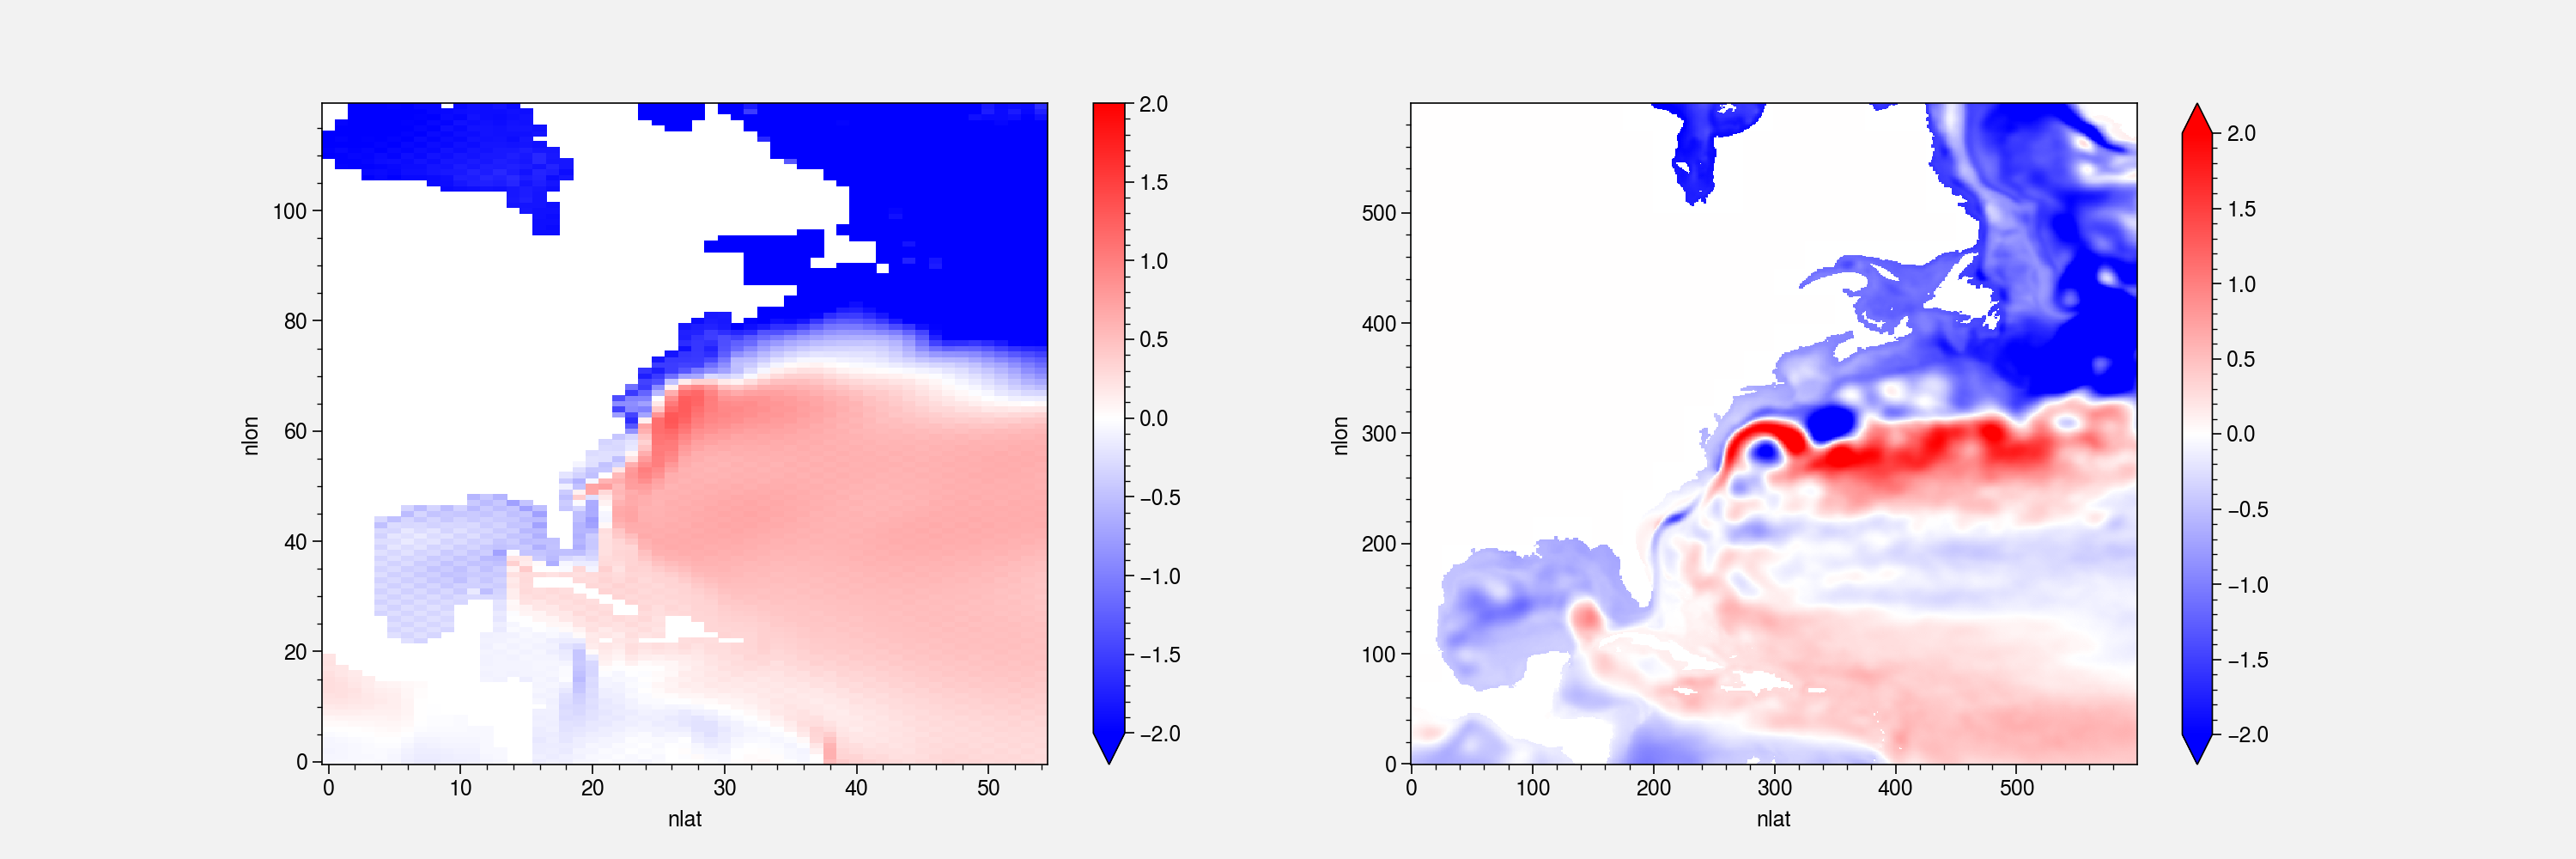

In [49]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
ssh2AMOCx_TL.plot(ax=axs[0], vmin=-2, vmax=2, cmap='bwr')
ssh2AMOCx_TH.plot(ax=axs[1], vmin=-2, vmax=2, cmap='bwr')

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


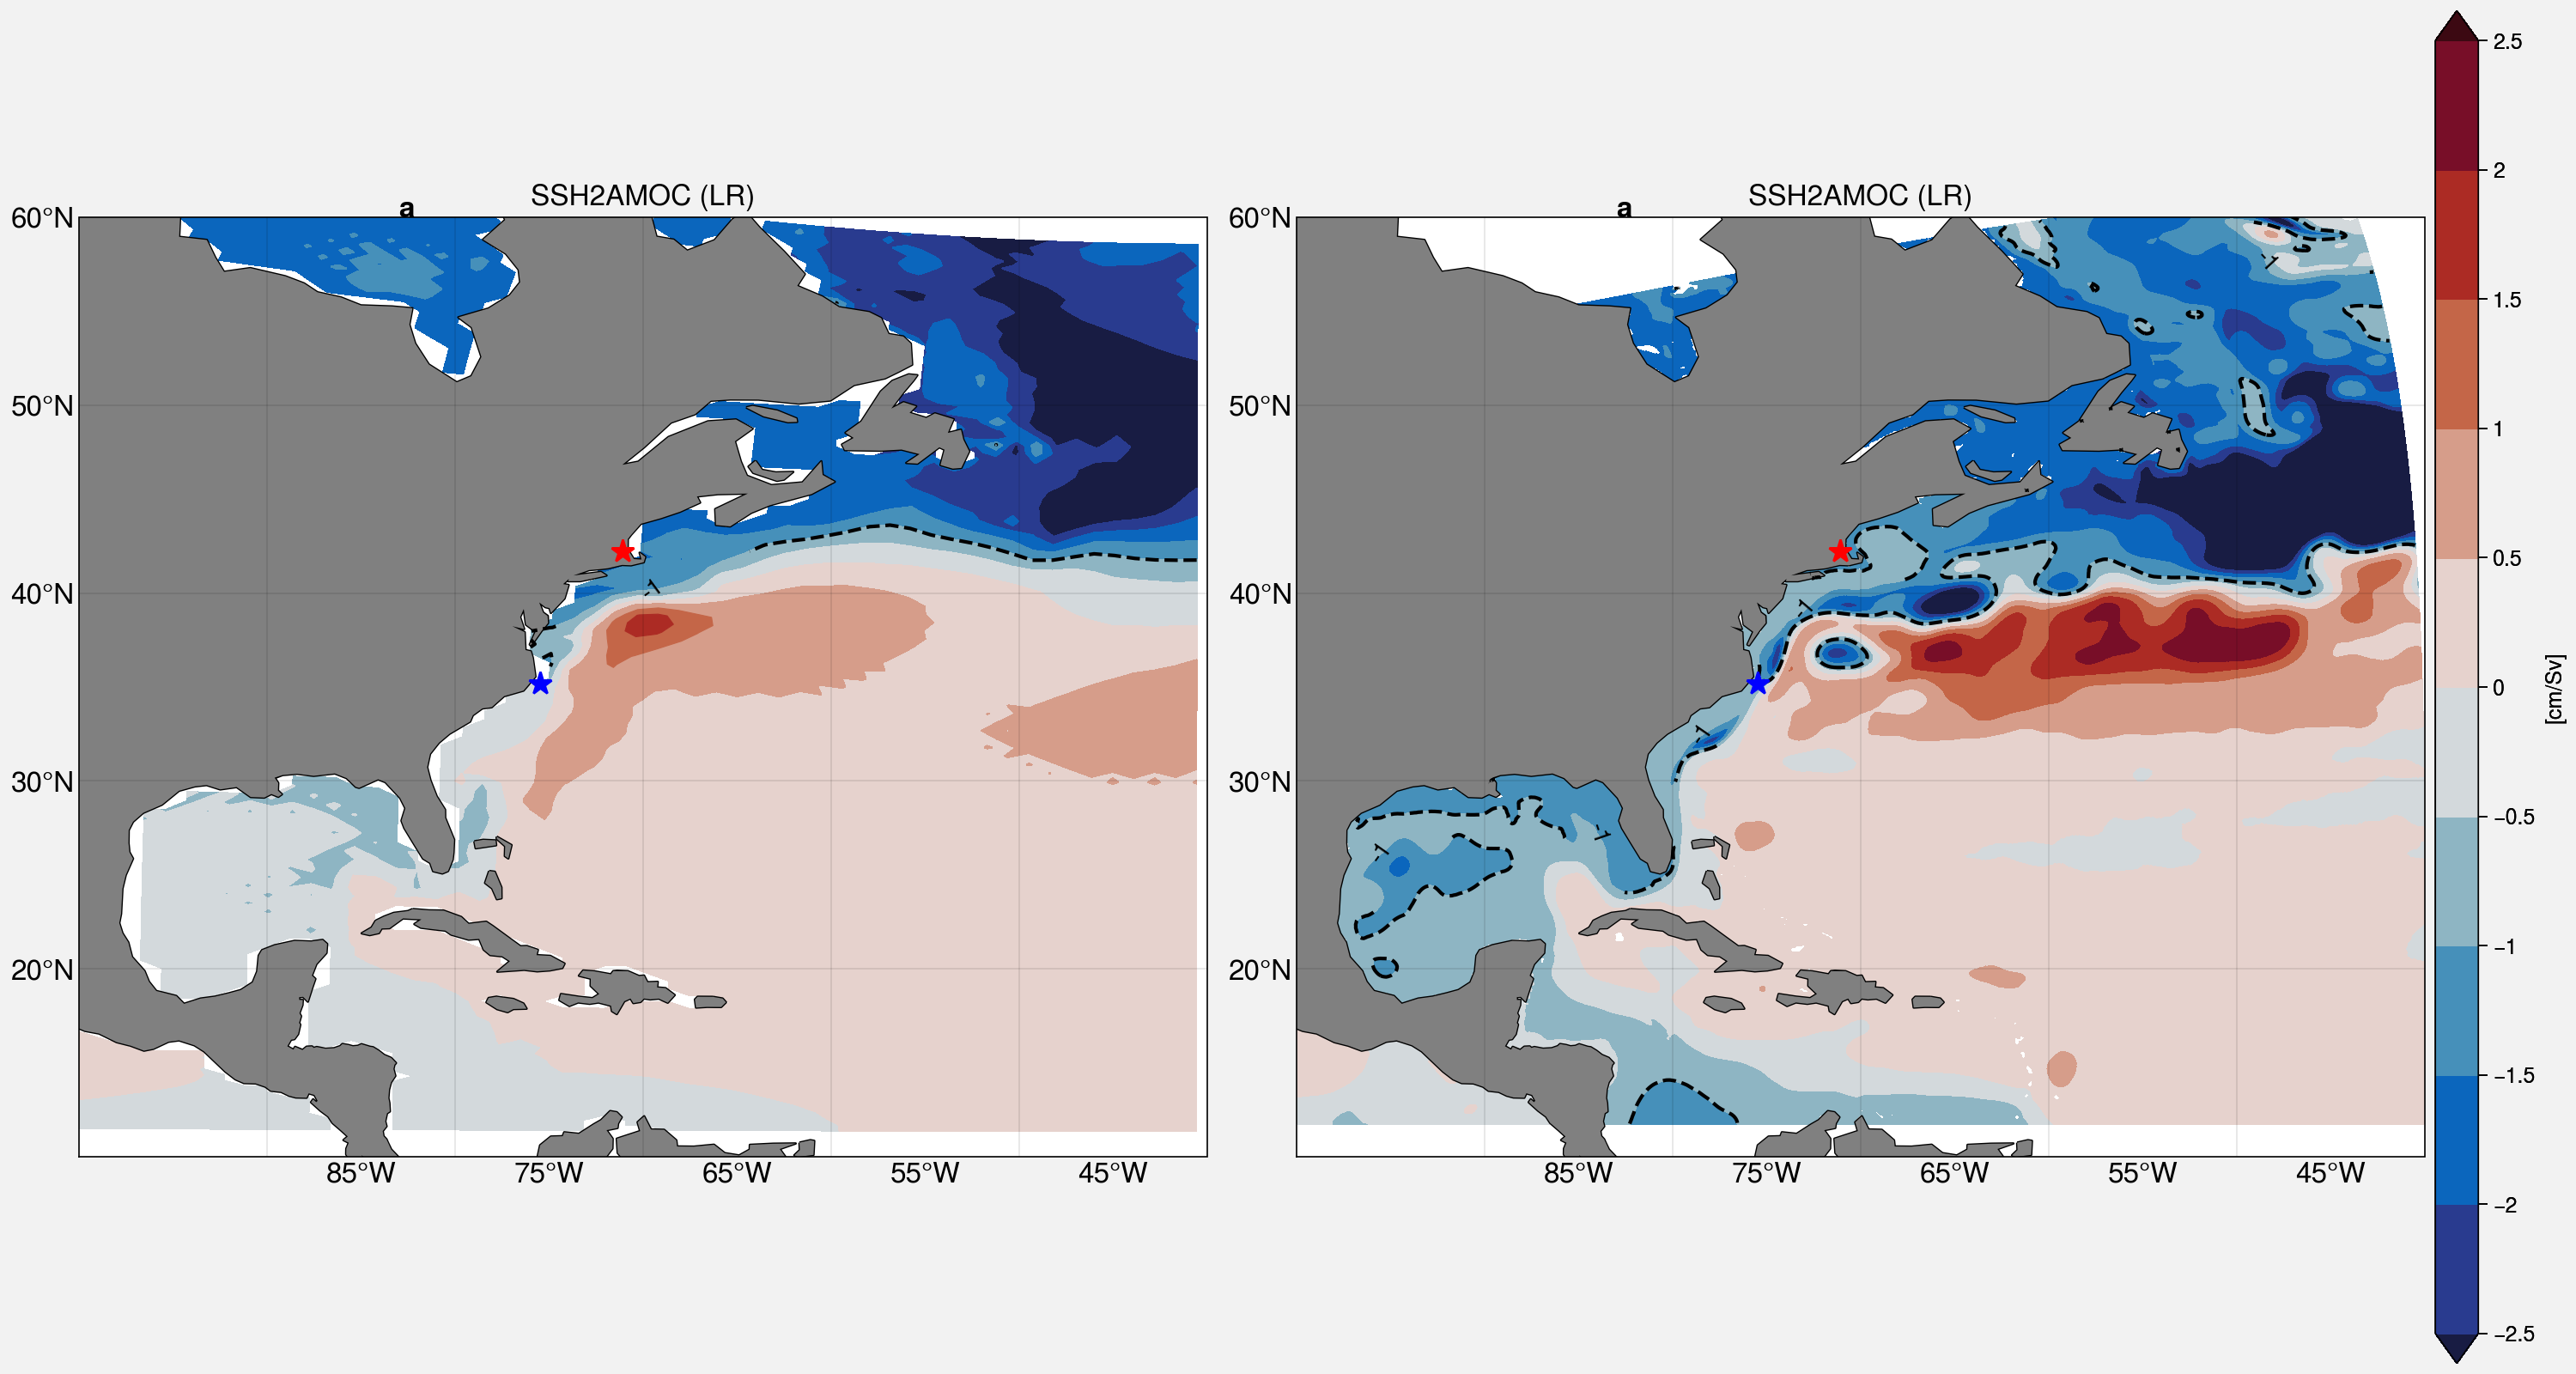

In [38]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=1,ncols=2,proj='cyl',width='15in',height='8in')

# row 1: projected ssh change
m00=axs[0,0].contourf(ssh_yr_TL.TLONG, ssh_yr_TL.TLAT, 
        ssh2AMOCx_TL, levels=np.arange(-2.5,2.5+0.1,0.5), transform=pc, 
        vmin=-2.5, vmax=2.5, cmap="balance", extend='both')
cs00=axs[0,0].contour(ssh_yr_TL.TLONG, ssh_yr_TL.TLAT, 
        ssh2AMOCx_TL, levels=[-1], transform=pc, 
        vmin=-2.5, vmax=2.5, color='k')
axs[0,0].clabel(cs00, inline=True, fmt='%d', fontsize=10)

# m00=axs[0,0].contourf(ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).longitude, ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).latitude, 
#         dssh_TL.sel(i=slice(200,280),j=slice(200,300)),  transform=pc, 
#          cmap="bwr", extend='both')
# axs[0,0].quiver(du_rgd_NA_TH.lon, du_rgd_NA_TH.lat, 
#                 du_rgd_NA_TH, dv_rgd_NA_TH, transform=pc,color='k')
axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
lon1,lon2 = -100, -40
lat1,lat2 = 10, 60
axs[0,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,0].set_xticks(np.arange(-85,-40+1,10), crs=pc)
axs[0,0].set_xticklabels(np.arange(-85,-40+1,10), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[0,0].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('SSH2AMOC (LR)', fontsize=12)
axs[0,0].text(-83, 60, 'a', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[0,0].colorbar(m00,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

#  row 1: projected ssh change
m01=axs[0,1].contourf(ssh_yr_TH.TLONG, ssh_yr_TH.TLAT, 
        ssh2AMOCx_TH, levels=np.arange(-2.5,2.5+0.1,0.5), transform=pc, 
        vmin=-2.5, vmax=2.5, cmap="balance", extend='both')
cs01=axs[0,1].contour(ssh_yr_TH.TLONG, ssh_yr_TH.TLAT, 
        ssh2AMOCx_TH, levels=[-1], transform=pc, 
        vmin=-2.5, vmax=2.5, color='k')
axs[0,1].clabel(cs01, inline=True, fmt='%d', fontsize=10)
# m00=axs[0,0].contourf(ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).longitude, ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).latitude, 
#         dssh_TL.sel(i=slice(200,280),j=slice(200,300)),  transform=pc, 
#          cmap="bwr", extend='both')
# axs[0,0].quiver(du_rgd_NA_TH.lon, du_rgd_NA_TH.lat, 
#                 du_rgd_NA_TH, dv_rgd_NA_TH, transform=pc,color='k')
axs[0,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
lon1,lon2 = -100, -40
lat1,lat2 = 10, 60
axs[0,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,1].set_xticks(np.arange(-85,-40+1,10), crs=pc)
axs[0,1].set_xticklabels(np.arange(-85,-40+1,10), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[0,1].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('SSH2AMOC (LR)', fontsize=12)
axs[0,1].text(-83, 60, 'a', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,1].colorbar(m01,loc='r',label='[cm/Sv]',extend='both',width='2em',shrink=1)

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


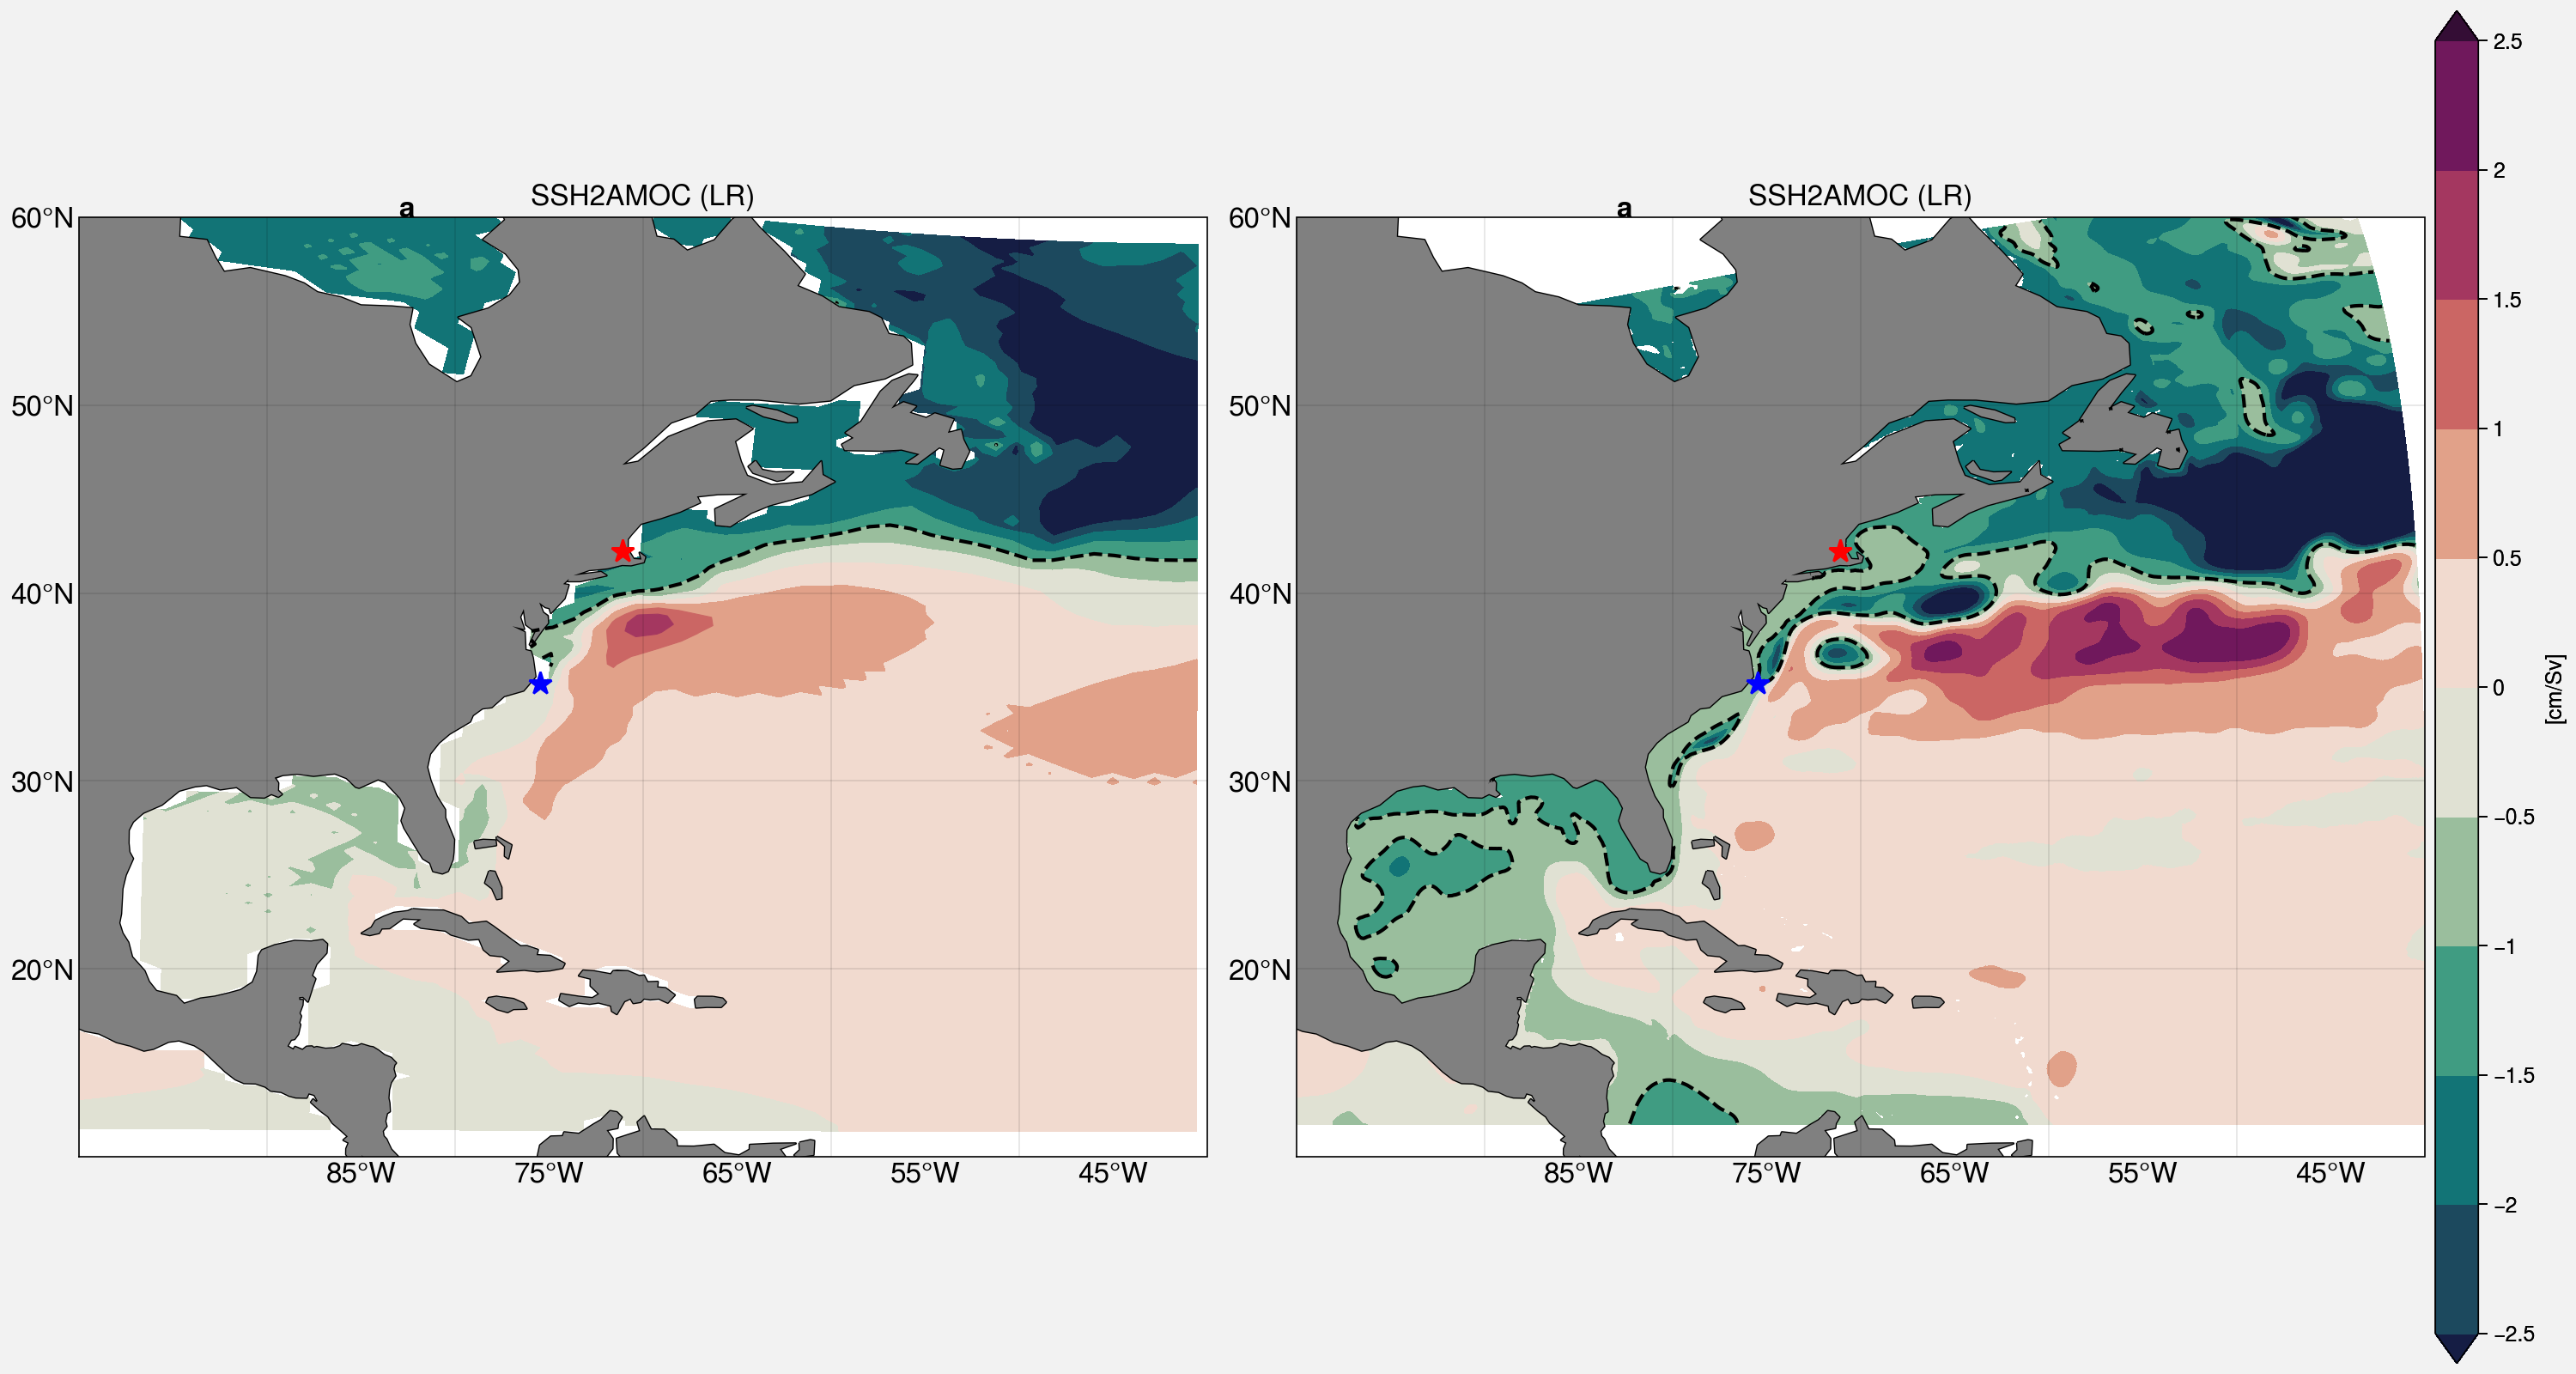

In [41]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=1,ncols=2,proj='cyl',width='15in',height='8in')

# row 1: projected ssh change
m00=axs[0,0].contourf(ssh_yr_TL.TLONG, ssh_yr_TL.TLAT, 
        ssh2AMOCx_TL, levels=np.arange(-2.5,2.5+0.1,0.5), transform=pc, 
        vmin=-2.5, vmax=2.5, cmap="curl", extend='both')
cs00=axs[0,0].contour(ssh_yr_TL.TLONG, ssh_yr_TL.TLAT, 
        ssh2AMOCx_TL, levels=[-1], transform=pc, 
        vmin=-2.5, vmax=2.5, color='k')
# axs[0,0].clabel(cs00, inline=True, fmt='%d', fontsize=10)

# m00=axs[0,0].contourf(ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).longitude, ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).latitude, 
#         dssh_TL.sel(i=slice(200,280),j=slice(200,300)),  transform=pc, 
#          cmap="bwr", extend='both')
# axs[0,0].quiver(du_rgd_NA_TH.lon, du_rgd_NA_TH.lat, 
#                 du_rgd_NA_TH, dv_rgd_NA_TH, transform=pc,color='k')
axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
lon1,lon2 = -100, -40
lat1,lat2 = 10, 60
axs[0,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,0].set_xticks(np.arange(-85,-40+1,10), crs=pc)
axs[0,0].set_xticklabels(np.arange(-85,-40+1,10), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[0,0].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('SSH2AMOC (LR)', fontsize=12)
axs[0,0].text(-83, 60, 'a', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[0,0].colorbar(m00,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

#  row 1: projected ssh change
m01=axs[0,1].contourf(ssh_yr_TH.TLONG, ssh_yr_TH.TLAT, 
        ssh2AMOCx_TH, levels=np.arange(-2.5,2.5+0.1,0.5), transform=pc, 
        vmin=-2.5, vmax=2.5, cmap="curl", extend='both')
cs01=axs[0,1].contour(ssh_yr_TH.TLONG, ssh_yr_TH.TLAT, 
        ssh2AMOCx_TH, levels=[-1], transform=pc, 
        vmin=-2.5, vmax=2.5, color='k')
# axs[0,1].clabel(cs01, inline=True, fmt='%d', fontsize=10)
# m00=axs[0,0].contourf(ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).longitude, ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).latitude, 
#         dssh_TL.sel(i=slice(200,280),j=slice(200,300)),  transform=pc, 
#          cmap="bwr", extend='both')
# axs[0,0].quiver(du_rgd_NA_TH.lon, du_rgd_NA_TH.lat, 
#                 du_rgd_NA_TH, dv_rgd_NA_TH, transform=pc,color='k')
axs[0,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
lon1,lon2 = -100, -40
lat1,lat2 = 10, 60
axs[0,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,1].set_xticks(np.arange(-85,-40+1,10), crs=pc)
axs[0,1].set_xticklabels(np.arange(-85,-40+1,10), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[0,1].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('SSH2AMOC (LR)', fontsize=12)
axs[0,1].text(-83, 60, 'a', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,1].colorbar(m01,loc='r',label='[cm/Sv]',extend='both',width='2em',shrink=1)

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


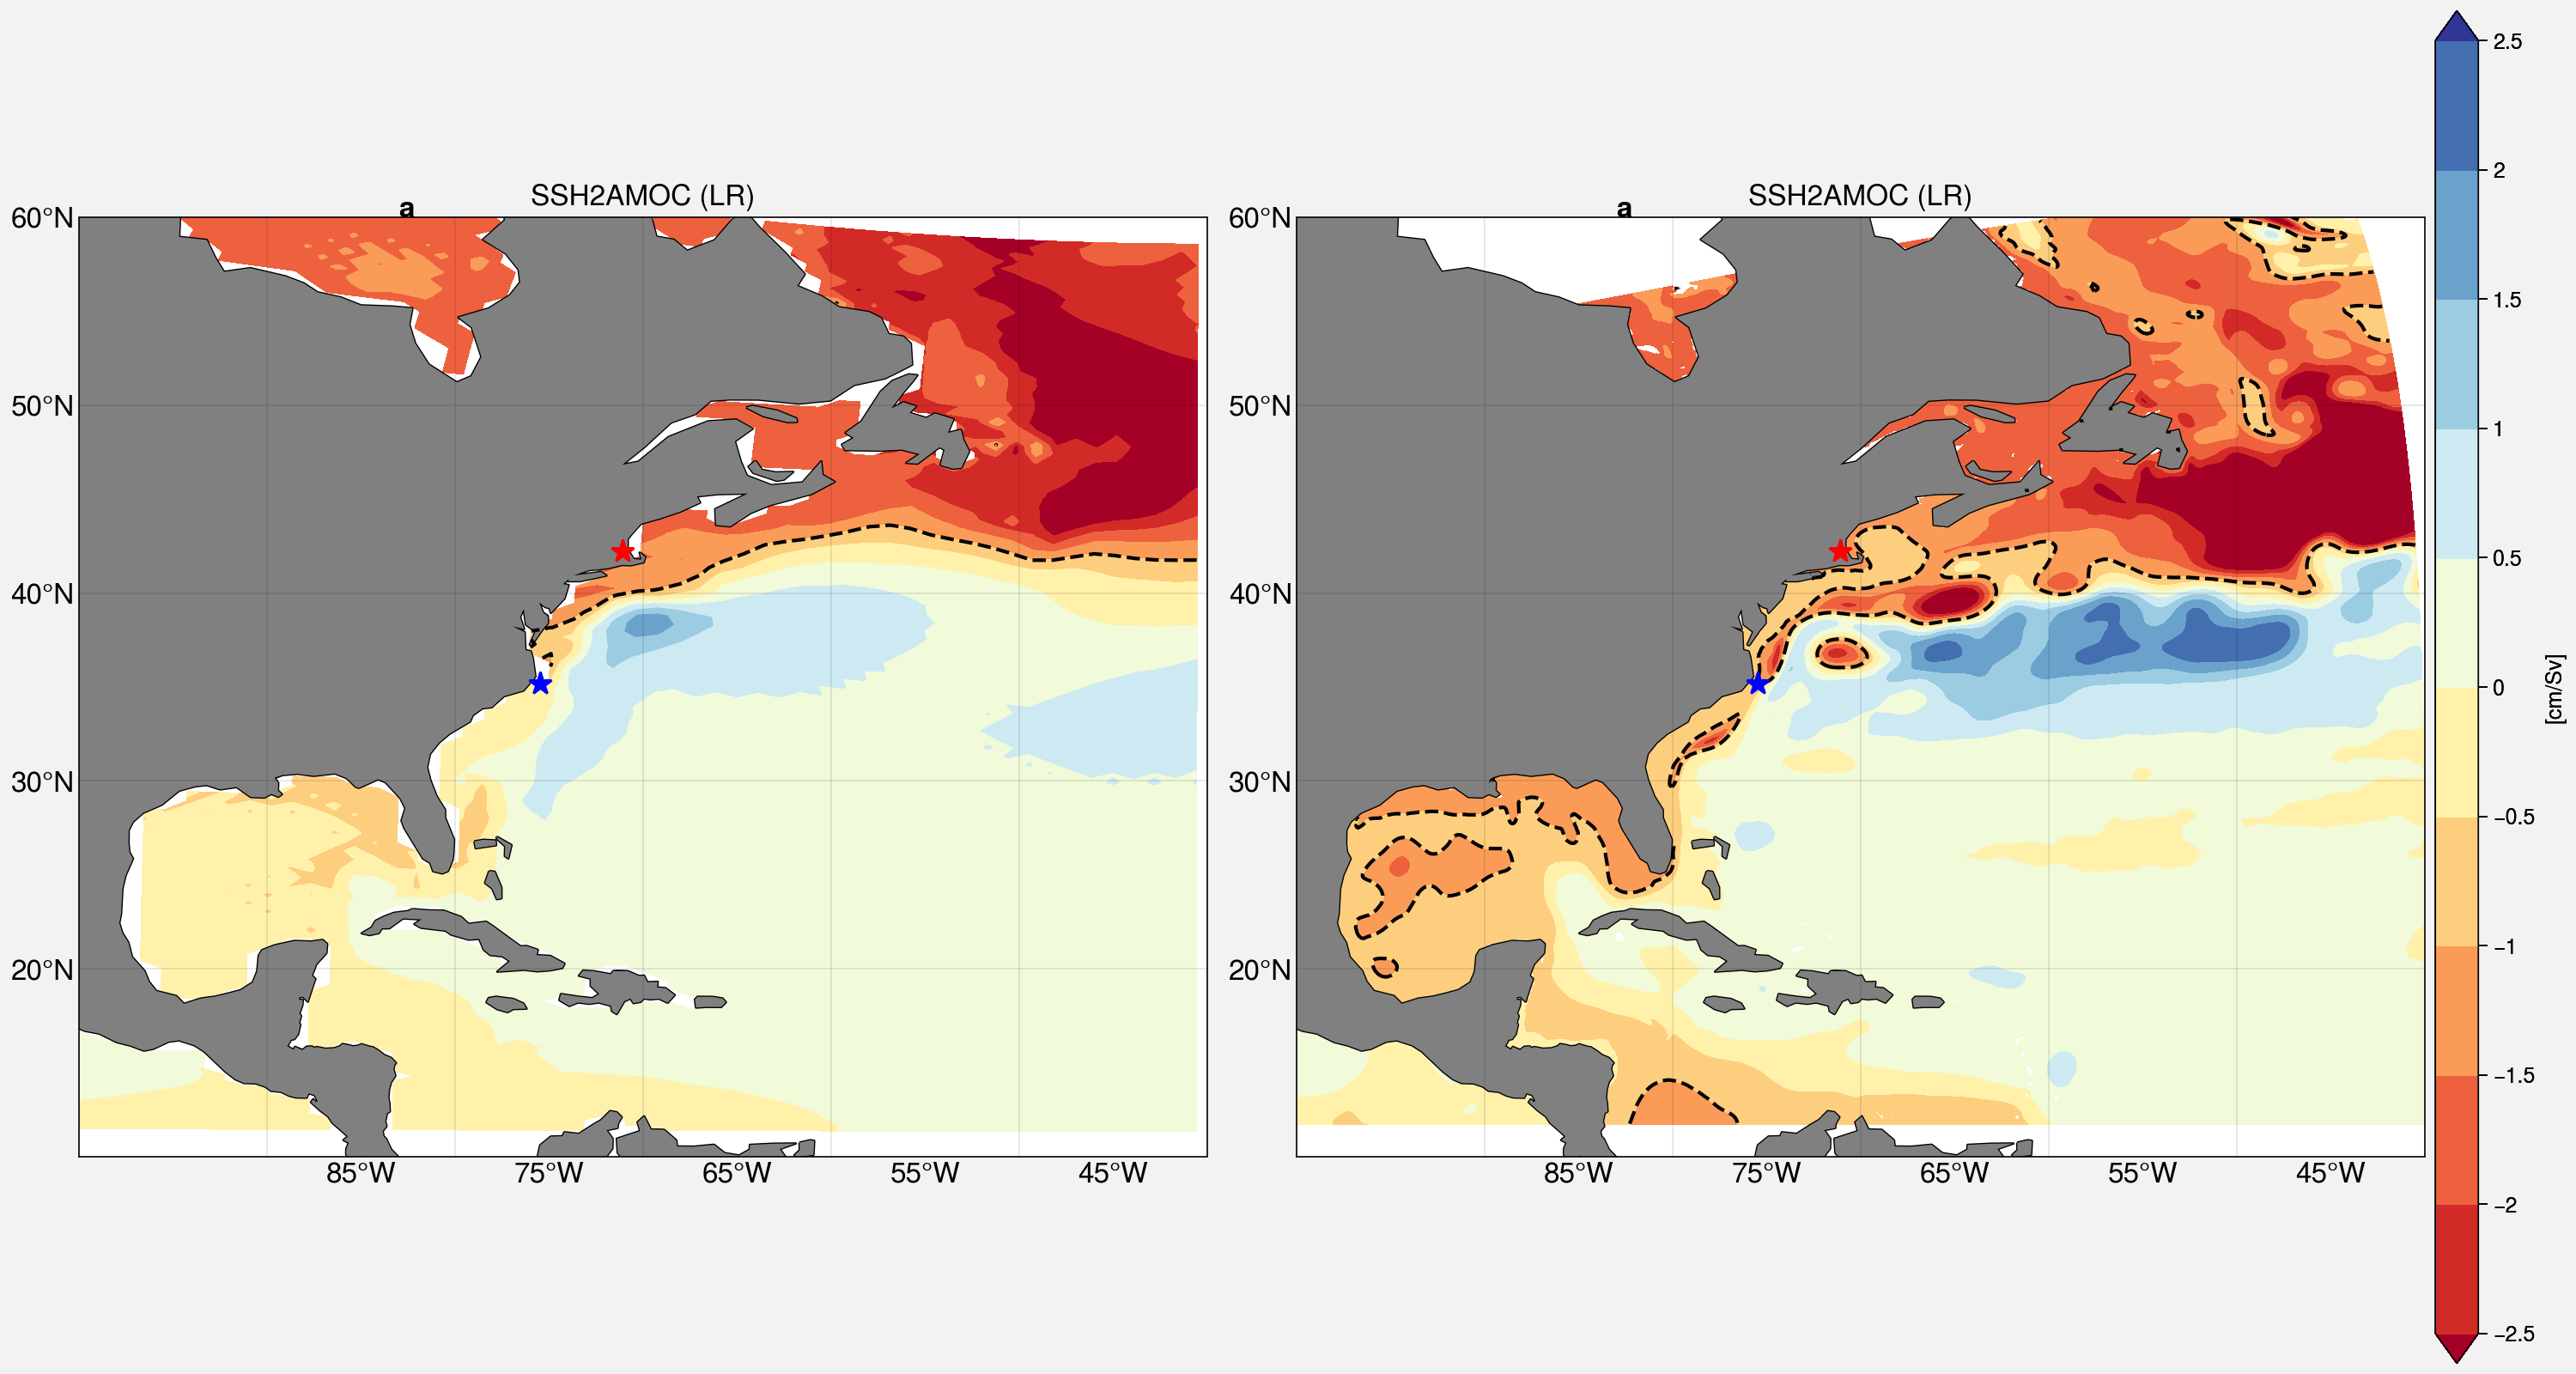

In [42]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=1,ncols=2,proj='cyl',width='15in',height='8in')

# row 1: projected ssh change
m00=axs[0,0].contourf(ssh_yr_TL.TLONG, ssh_yr_TL.TLAT, 
        ssh2AMOCx_TL, levels=np.arange(-2.5,2.5+0.1,0.5), transform=pc, 
        vmin=-2.5, vmax=2.5, cmap="RdYlBu", extend='both')
cs00=axs[0,0].contour(ssh_yr_TL.TLONG, ssh_yr_TL.TLAT, 
        ssh2AMOCx_TL, levels=[-1], transform=pc, 
        vmin=-2.5, vmax=2.5, color='k')
# axs[0,0].clabel(cs00, inline=True, fmt='%d', fontsize=10)

# m00=axs[0,0].contourf(ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).longitude, ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).latitude, 
#         dssh_TL.sel(i=slice(200,280),j=slice(200,300)),  transform=pc, 
#          cmap="bwr", extend='both')
# axs[0,0].quiver(du_rgd_NA_TH.lon, du_rgd_NA_TH.lat, 
#                 du_rgd_NA_TH, dv_rgd_NA_TH, transform=pc,color='k')
axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
lon1,lon2 = -100, -40
lat1,lat2 = 10, 60
axs[0,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,0].set_xticks(np.arange(-85,-40+1,10), crs=pc)
axs[0,0].set_xticklabels(np.arange(-85,-40+1,10), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[0,0].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('SSH2AMOC (LR)', fontsize=12)
axs[0,0].text(-83, 60, 'a', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[0,0].colorbar(m00,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

#  row 1: projected ssh change
m01=axs[0,1].contourf(ssh_yr_TH.TLONG, ssh_yr_TH.TLAT, 
        ssh2AMOCx_TH, levels=np.arange(-2.5,2.5+0.1,0.5), transform=pc, 
        vmin=-2.5, vmax=2.5, cmap="RdYlBu", extend='both')
cs01=axs[0,1].contour(ssh_yr_TH.TLONG, ssh_yr_TH.TLAT, 
        ssh2AMOCx_TH, levels=[-1], transform=pc, 
        vmin=-2.5, vmax=2.5, color='k')
# axs[0,1].clabel(cs01, inline=True, fmt='%d', fontsize=10)
# m00=axs[0,0].contourf(ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).longitude, ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).latitude, 
#         dssh_TL.sel(i=slice(200,280),j=slice(200,300)),  transform=pc, 
#          cmap="bwr", extend='both')
# axs[0,0].quiver(du_rgd_NA_TH.lon, du_rgd_NA_TH.lat, 
#                 du_rgd_NA_TH, dv_rgd_NA_TH, transform=pc,color='k')
axs[0,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
lon1,lon2 = -100, -40
lat1,lat2 = 10, 60
axs[0,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,1].set_xticks(np.arange(-85,-40+1,10), crs=pc)
axs[0,1].set_xticklabels(np.arange(-85,-40+1,10), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[0,1].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('SSH2AMOC (LR)', fontsize=12)
axs[0,1].text(-83, 60, 'a', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,1].colorbar(m01,loc='r',label='[cm/Sv]',extend='both',width='2em',shrink=1)

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


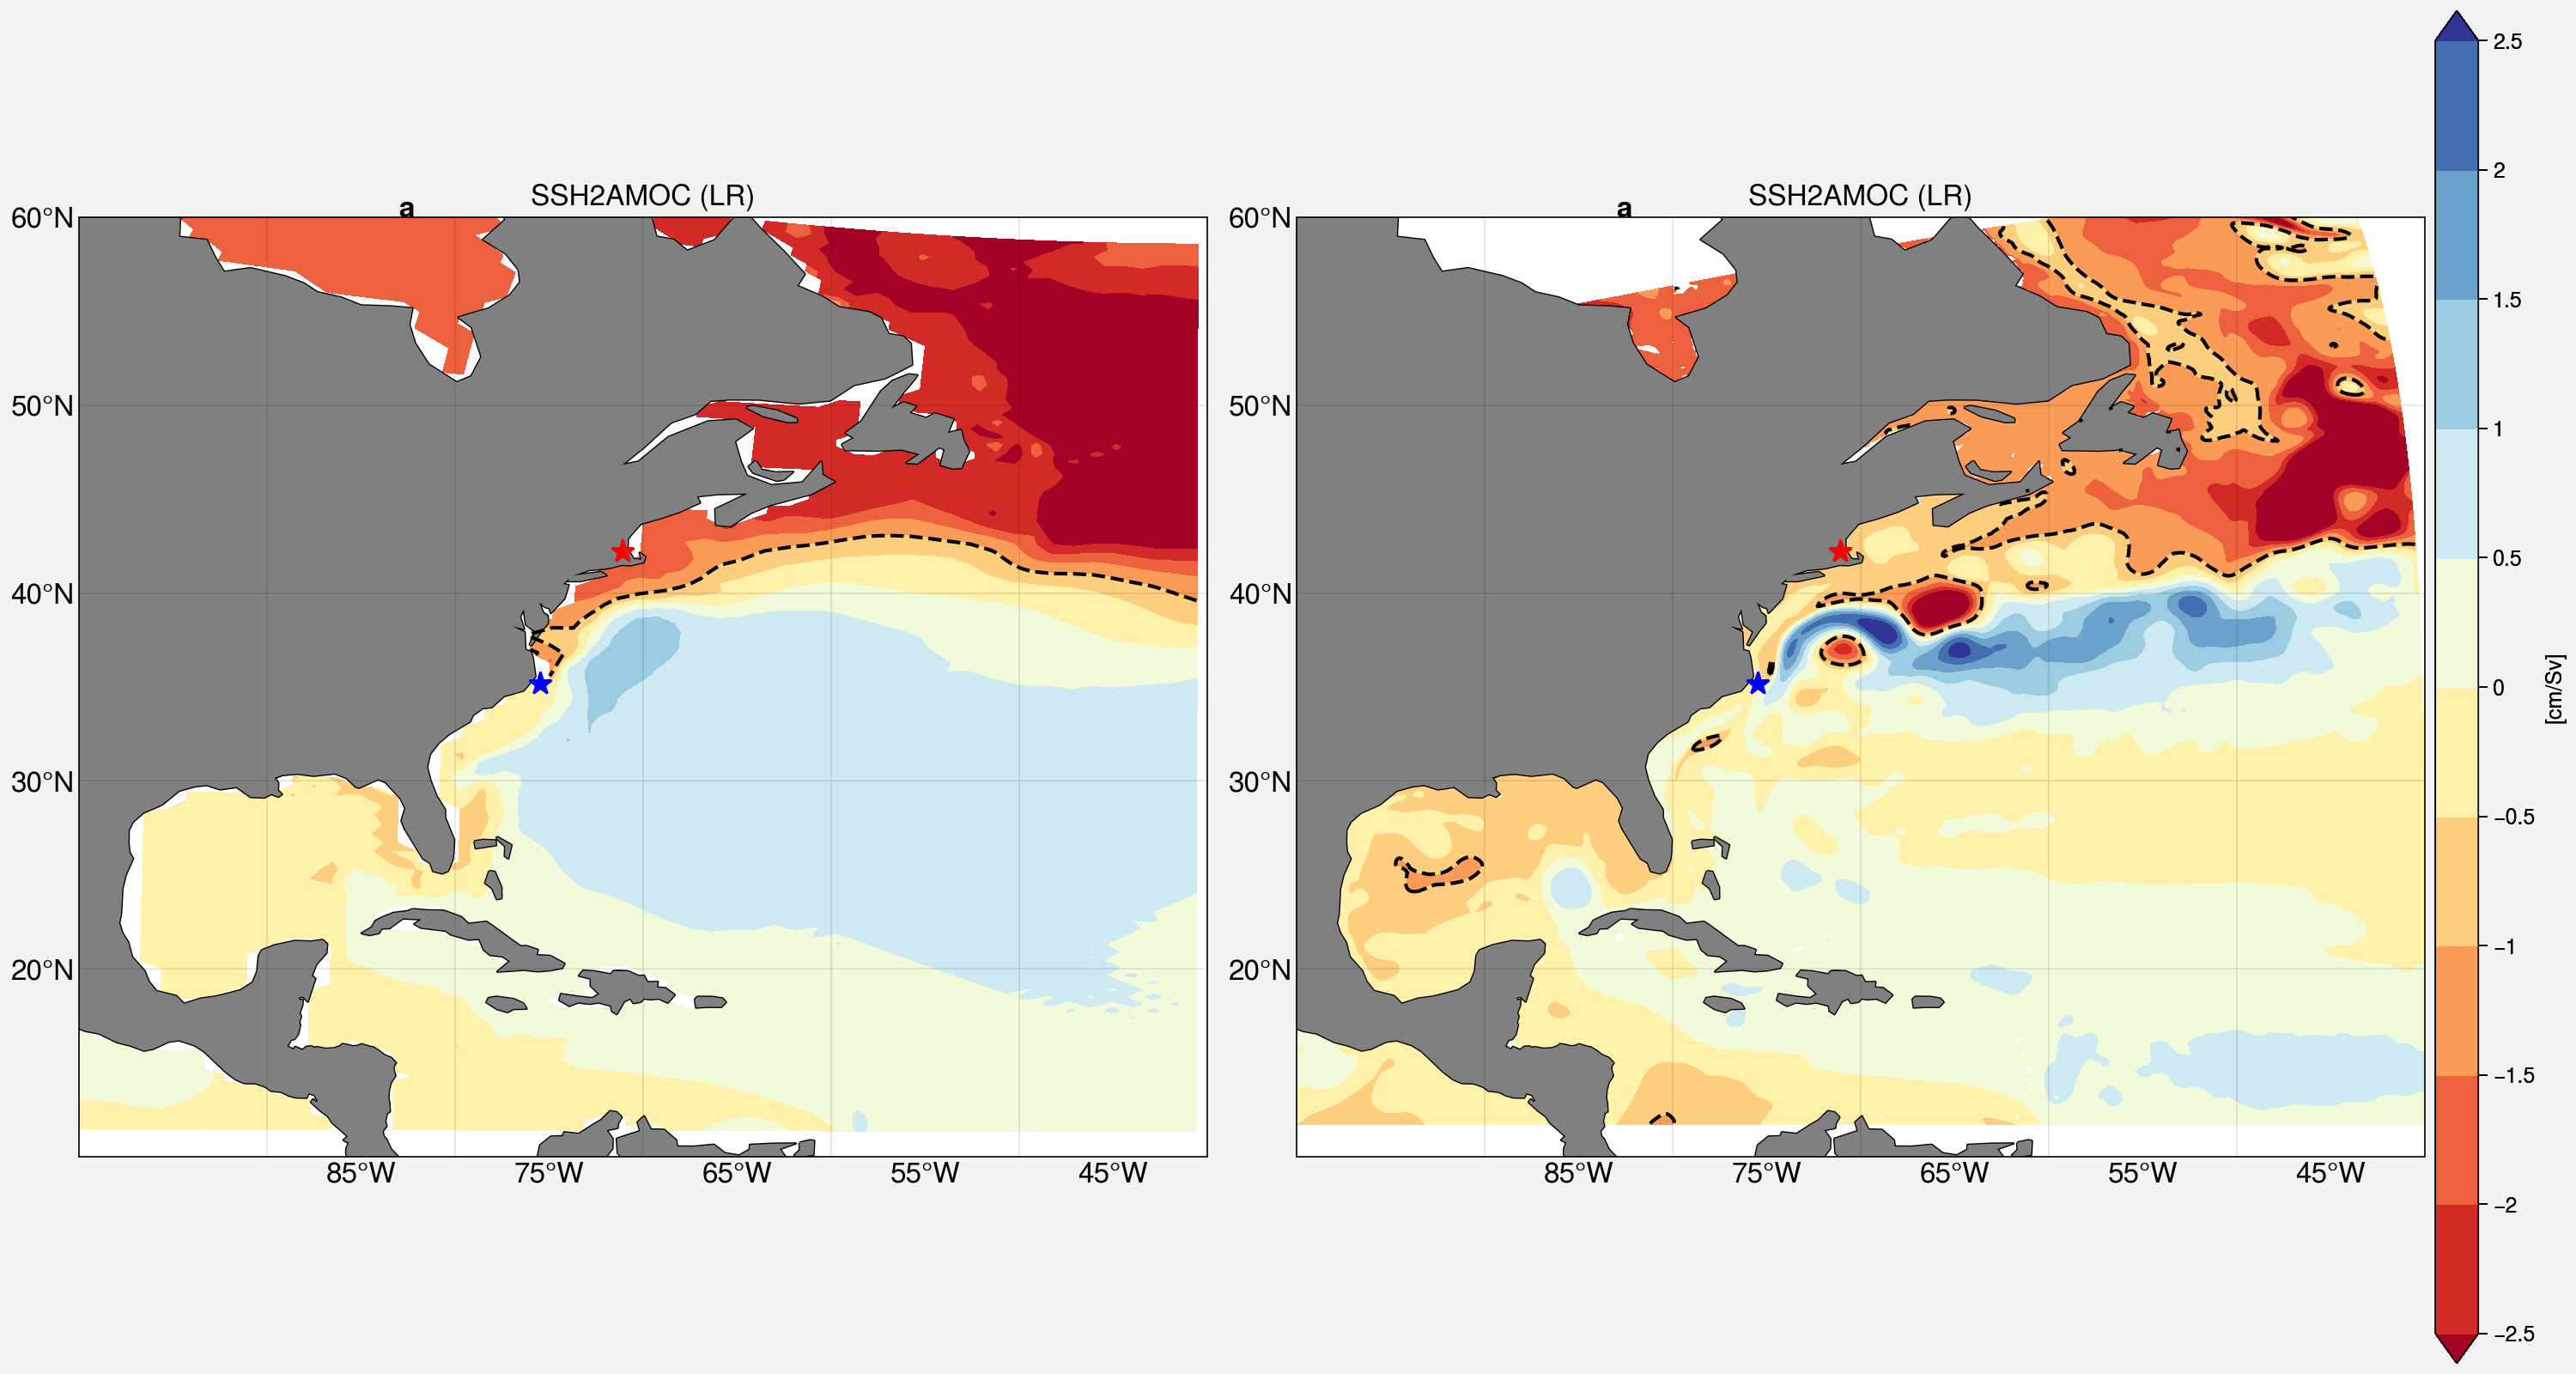

In [50]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=1,ncols=2,proj='cyl',width='15in',height='8in')

# row 1: projected ssh change
m00=axs[0,0].contourf(ssh_yr_TL.TLONG, ssh_yr_TL.TLAT, 
        ssh2AMOCx_TL, levels=np.arange(-2.5,2.5+0.1,0.5), transform=pc, 
        vmin=-2.5, vmax=2.5, cmap="RdYlBu", extend='both')
cs00=axs[0,0].contour(ssh_yr_TL.TLONG, ssh_yr_TL.TLAT, 
        ssh2AMOCx_TL, levels=[-1], transform=pc, 
        vmin=-2.5, vmax=2.5, color='k')
# axs[0,0].clabel(cs00, inline=True, fmt='%d', fontsize=10)

# m00=axs[0,0].contourf(ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).longitude, ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).latitude, 
#         dssh_TL.sel(i=slice(200,280),j=slice(200,300)),  transform=pc, 
#          cmap="bwr", extend='both')
# axs[0,0].quiver(du_rgd_NA_TH.lon, du_rgd_NA_TH.lat, 
#                 du_rgd_NA_TH, dv_rgd_NA_TH, transform=pc,color='k')
axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
lon1,lon2 = -100, -40
lat1,lat2 = 10, 60
axs[0,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,0].set_xticks(np.arange(-85,-40+1,10), crs=pc)
axs[0,0].set_xticklabels(np.arange(-85,-40+1,10), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[0,0].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('SSH2AMOC (LR)', fontsize=12)
axs[0,0].text(-83, 60, 'a', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[0,0].colorbar(m00,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

#  row 1: projected ssh change
m01=axs[0,1].contourf(ssh_yr_TH.TLONG, ssh_yr_TH.TLAT, 
        ssh2AMOCx_TH, levels=np.arange(-2.5,2.5+0.1,0.5), transform=pc, 
        vmin=-2.5, vmax=2.5, cmap="RdYlBu", extend='both')
cs01=axs[0,1].contour(ssh_yr_TH.TLONG, ssh_yr_TH.TLAT, 
        ssh2AMOCx_TH, levels=[-1], transform=pc, 
        vmin=-2.5, vmax=2.5, color='k')
# axs[0,1].clabel(cs01, inline=True, fmt='%d', fontsize=10)
# m00=axs[0,0].contourf(ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).longitude, ssh1_TL.sel(i=slice(200,280),j=slice(200,300)).latitude, 
#         dssh_TL.sel(i=slice(200,280),j=slice(200,300)),  transform=pc, 
#          cmap="bwr", extend='both')
# axs[0,0].quiver(du_rgd_NA_TH.lon, du_rgd_NA_TH.lat, 
#                 du_rgd_NA_TH, dv_rgd_NA_TH, transform=pc,color='k')
axs[0,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
lon1,lon2 = -100, -40
lat1,lat2 = 10, 60
axs[0,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,1].set_xticks(np.arange(-85,-40+1,10), crs=pc)
axs[0,1].set_xticklabels(np.arange(-85,-40+1,10), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[0,1].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('SSH2AMOC (LR)', fontsize=12)
axs[0,1].text(-83, 60, 'a', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,1].colorbar(m01,loc='r',label='[cm/Sv]',extend='both',width='2em',shrink=1)

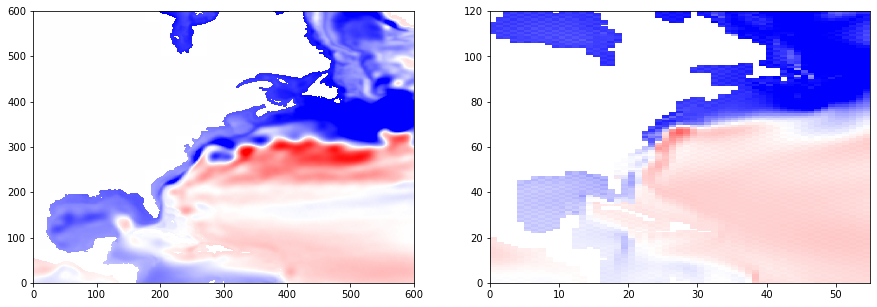

In [72]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].pcolormesh(ssh2AMOC_TH,cmap='bwr',vmin=-2,vmax=2)
axs[1].pcolormesh(ssh2AMOC_TL,cmap='bwr',vmin=-2,vmax=2)

In [43]:
xr.DataArray(ssh2AMOC_TH[0])

<xarray.DataArray (dim_0: 360000)>
array([-0.17868394, -0.18842161, -0.18940216, ...,         nan,
               nan,         nan])
Dimensions without coordinates: dim_0

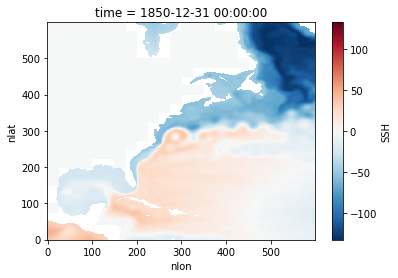

In [17]:
a.unstack("z").isel(time=0).plot()

In [30]:
ssh_yr_TH

<xarray.DataArray 'SSH' (time: 251, nlat: 600, nlon: 600)>
array([[[ 34.400337 ,  34.243893 ,  34.122112 , ..., -11.238742 ,
         -11.324477 , -11.432992 ],
        [ 34.982433 ,  34.851162 ,  34.687733 , ..., -11.160183 ,
         -11.270339 , -11.357411 ],
        [ 35.666416 ,  35.48891  ,  35.344448 , ..., -11.0978775,
         -11.185508 , -11.294236 ],
        ...,
        [ -1.       ,  -1.       ,  -1.       , ...,         nan,
                 nan,         nan],
        [ -1.       ,  -1.       ,  -1.       , ...,         nan,
                 nan,         nan],
        [ -1.       ,  -1.       ,  -1.       , ...,         nan,
                 nan,         nan]],

       [[ 36.639233 ,  36.498375 ,  36.40364  , ..., -11.813201 ,
         -11.876839 , -11.935805 ],
        [ 37.38331  ,  37.308155 ,  37.16671  , ..., -11.8349695,
         -11.895064 , -11.960991 ],
        [ 38.17917  ,  38.05287  ,  37.972187 , ..., -11.846873 ,
         -11.915687 , -11.983944 ],
...
        [ -1.       ,  -1.       ,  -1.       , ...,         nan,
                 nan,         nan],
        [ -1.       ,  -1.       ,  -1.       , ...,         nan,
                 nan,         nan],
        [ -1.       ,  -1.       ,  -1.       , ...,         nan,
                 nan,         nan]],

       [[ 37.822224 ,  37.653687 ,  37.474293 , ..., -15.342323 ,
         -15.340186 , -15.400177 ],
        [ 38.459904 ,  38.25161  ,  38.071102 , ..., -15.4499235,
         -15.519553 , -15.504725 ],
        [ 39.081783 ,  38.880722 ,  38.66524  , ..., -15.614712 ,
         -15.612346 , -15.669597 ],
        ...,
        [ -1.       ,  -1.       ,  -1.       , ...,         nan,
                 nan,         nan],
        [ -1.       ,  -1.       ,  -1.       , ...,         nan,
                 nan,         nan],
        [ -1.       ,  -1.       ,  -1.       , ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG    (nlat, nlon) float64 260.1 260.1 260.2 260.3 ... 315.4 315.6 315.7
    TLAT     (nlat, nlon) float64 11.77 11.77 11.77 11.77 ... 61.8 61.81 61.82
Dimensions without coordinates: nlat, nlon

In [39]:
ssh_yr_TH.nlat.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [42]:
for ilat in ssh_yr_TH.nlat.values:
#     print(ilat)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
xr.DataArray(pf[0])

In [32]:
for iyr in np.arange(0,len(MOC45_yr_TH.time)):
    
    
np.polyfit(MOC45_yr_TL, ssh_yr_TL, deg=1)

TypeError: expected 1D or 2D array for y

read grid files

In [11]:
ds0_g16 = xr.open_dataset(infile0_g16)
ds0_t12 = xr.open_dataset(infile0_t12)

In [12]:
grid_t12, xds_t12 = pop_tools.to_xgcm_grid_dataset(ds0_t12)
grid_g16, xds_g16 = pop_tools.to_xgcm_grid_dataset(ds0_g16)

_, xds_ssh_TH = pop_tools.to_xgcm_grid_dataset(ds_ssh_TH)
# _, xds_ssh_CH = pop_tools.to_xgcm_grid_dataset(ds_ssh_CH)
_, xds_ssh_TL = pop_tools.to_xgcm_grid_dataset(ds_ssh_TL)
# _, xds_ssh_CL = pop_tools.to_xgcm_grid_dataset(ds_ssh_CL)

ds_h_rst_TH.h_rst.attrs['grid_loc']=2110 # add grid loc for xgcm to recognize tgrids
# ds_h_st_CH.h_rst.attrs['grid_loc']=2110 # add grid loc for xgcm to recognize tgrids
ds_h_rst_TL.h_rst.attrs['grid_loc']=2110 # add grid loc for xgcm to recognize tgrids
# ds_h_st_CL.h_rst.attrs['grid_loc']=2110 # add grid loc for xgcm to recognize tgrids

_, xds_h_rst_TH = pop_tools.to_xgcm_grid_dataset(ds_h_rst_TH)
# _, xds_h_st_CH = pop_tools.to_xgcm_grid_dataset(ds_h_st_CH)
_, xds_h_rst_TL = pop_tools.to_xgcm_grid_dataset(ds_h_rst_TL)
# _, xds_h_st_CL = pop_tools.to_xgcm_grid_dataset(ds_h_st_CL)

In [13]:
xds_t12.xoak.set_index(['TLAT', 'TLONG'], 'scipy_kdtree')
xds_g16.xoak.set_index(['TLAT', 'TLONG'], 'scipy_kdtree')

In [14]:
# Boston (71.1W, 42.4N), New york (74.0W, 40.7N), 
# I adjust lat and lon a little because the original lat lon are on land (KMT=0)
# cities_t12 = xds_t12.xoak.sel(
#     TLONG=xr.Variable("cities", [-69.9+360, -74+360]),
#     TLAT=xr.Variable("cities", [42, 40.5]))
cities_t12 = xds_t12.xoak.sel(
    TLONG=xr.Variable("cities", [-70.5+360, -74+360]),
    TLAT=xr.Variable("cities", [42.0, 40.5]))
cities_t12

<xarray.Dataset>
Dimensions:      (cities: 2, nlat_u: 2400, nlon_u: 3600, z_t: 62, z_w: 62, z_w_bot: 62)
Coordinates:
    TLAT         (cities) float64 42.0 40.5
    TLONG        (cities) float64 289.5 286.0
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05 5.75e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5.5e+05 5.75e+05 6e+05
  * nlon_u       (nlon_u) int64 1 2 3 4 5 6 7 ... 3595 3596 3597 3598 3599 3600
  * nlat_u       (nlat_u) int64 1 2 3 4 5 6 7 ... 2395 2396 2397 2398 2399 2400
    nlon_t       (cities) float64 403.5 366.5
    nlat_t       (cities) float64 1.65e+03 1.634e+03
Dimensions without coordinates: cities
Data variables:
    ULAT         (nlat_u, nlon_u) float64 -78.45 -78.45 -78.45 ... 62.34 62.34
    ULONG        (nlat_u, nlon_u) float64 -109.9 -109.8 -109.7 ... -110.0 -110.0
    DXT          (cities) float64 8.265e+05 8.43e+05
    DYT          (cities) float64 8.039e+05 8.016e+05
    TAREA        (cities) float64 6.644e+11 6.757e+11
    KMT          (cities) int32 3 3
    REGION_MASK  (cities) int32 6 6
    dz           (z_t) float64 ...
Attributes:
    lateral_dims:       [2400 3600]
    vertical_dims:      62
    vert_grid_file:     tx0.1v3_vert_grid
    horiz_grid_fname:   inputdata/ocn/pop/tx0.1v2/grid/horiz_grid_200709.ieeer8
    topography_fname:   inputdata/ocn/pop/tx0.1v2/grid/topography_km62_201711...
    region_mask_fname:  inputdata/ocn/pop/tx0.1v2/grid/region_mask_20080702.i...
    type:               tripole
    title:              POP_tx0.1v2 grid

In [15]:
# Boston (71.1W, 42.4N), New york (74.0W, 40.7N), 
# I adjust lat and lon a little because the original lat lon are on land (KMT=0)
cities_g16 = xds_g16.xoak.sel(
    TLONG=xr.Variable("cities", [-70.5+360, -74+360]),
    TLAT=xr.Variable("cities", [42.0, 40.5]))
cities_g16

<xarray.Dataset>
Dimensions:      (cities: 2, nlat_u: 384, nlon_u: 320, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
    TLAT         (cities) float64 41.93 40.33
    TLONG        (cities) float64 289.9 286.4
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
  * nlon_u       (nlon_u) int64 1 2 3 4 5 6 7 8 ... 314 315 316 317 318 319 320
  * nlat_u       (nlat_u) int64 1 2 3 4 5 6 7 8 ... 378 379 380 381 382 383 384
    nlon_t       (cities) float64 292.5 289.5
    nlat_t       (cities) float64 305.5 301.5
Dimensions without coordinates: cities
Data variables:
    ULAT         (nlat_u, nlon_u) float64 -78.95 -78.95 -78.95 ... 72.41 72.41
    ULONG        (nlat_u, nlon_u) float64 321.1 322.3 323.4 ... 319.6 320.0
    DXT          (cities) float64 9.084e+06 9.35e+06
    DYT          (cities) float64 4.826e+06 4.917e+06
    TAREA        (cities) float64 4.383e+13 4.598e+13
    KMT          (cities) int32 6 3
    REGION_MASK  (cities) int32 6 6
    dz           (z_t) float64 ...
Attributes:
    lateral_dims:         [384 320]
    vertical_dims:        60
    vert_grid_file:       gx1v7_vert_grid
    horiz_grid_fname:     inputdata/ocn/pop/gx1v6/grid/horiz_grid_20010402.ie...
    topography_fname:     inputdata/ocn/pop/gx1v6/grid/topography_20090204.ie...
    region_mask_fname:    inputdata/ocn/pop/gx1v6/grid/region_mask_20090205.i...
    type:                 dipole
    region_mask_regions:  {'Caspian Sea': -14, 'Black Sea': -13, 'Baltic Sea'...
    title:                POP_gx1v6 grid

In [16]:
print('real lon and lat for Boston and New York')
print([-71.1+360, 42.4])
print([-74.0+360, 40.7])

ssh_TH=xds_ssh_TH.sel(nlon_t=cities_t12.nlon_t.values,nlat_t=cities_t12.nlat_t.values).SSH
print('lon and lat on t12 grid')
print(ssh_TH.isel(nlon_t=0,nlat_t=0).TLONG.values,ssh_TH.isel(nlon_t=0,nlat_t=0).TLAT.values)
print(ssh_TH.isel(nlon_t=1,nlat_t=1).TLONG.values,ssh_TH.isel(nlon_t=1,nlat_t=1).TLAT.values)

ssh_TL=xds_ssh_TL.sel(nlon_t=cities_g16.nlon_t.values,nlat_t=cities_g16.nlat_t.values).SSH
print('lon and lat on g16 grid')
print(ssh_TL.isel(nlon_t=0,nlat_t=0).TLONG.values,ssh_TL.isel(nlon_t=0,nlat_t=0).TLAT.values)
print(ssh_TL.isel(nlon_t=1,nlat_t=1).TLONG.values,ssh_TL.isel(nlon_t=1,nlat_t=1).TLAT.values)

h_rst_TH=xds_h_rst_TH.sel(nlon_t=cities_t12.nlon_t.values,
                    nlat_t=cities_t12.nlat_t.values).h_rst
h_rst_TL=xds_h_rst_TL.sel(nlon_t=cities_g16.nlon_t.values,
                    nlat_t=cities_g16.nlat_t.values).h_rst

ssh_TH

real lon and lat for Boston and New York
[288.9, 42.4]
[286.0, 40.7]
lon and lat on t12 grid
289.4927248651452 42.000363243223966
285.9800385551817 40.5009890332746
lon and lat on g16 grid
289.87680609401775 41.92955449401052
286.4429434610795 40.32675645820816


<xarray.DataArray 'SSH' (time: 3012, nlat_t: 2, nlon_t: 2)>
dask.array<getitem, shape=(3012, 2, 2), dtype=float32, chunksize=(3012, 2, 2), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-02-01 00:00:00 ... 2100-12-17 00:00:00
    TLONG    (nlat_t, nlon_t) float64 dask.array<chunksize=(2, 2), meta=np.ndarray>
    TLAT     (nlat_t, nlon_t) float64 dask.array<chunksize=(2, 2), meta=np.ndarray>
  * nlon_t   (nlon_t) float64 403.5 366.5
  * nlat_t   (nlat_t) float64 1.65e+03 1.634e+03
Attributes:
    long_name:     Sea Surface Height
    units:         centimeter
    grid_loc:      2110
    cell_methods:  time: mean

In [17]:
ssh_yr_TH = ssh_TH.resample(time='A').mean('time')
ssh_yr_TL = ssh_TL.resample(time='A').mean('time')
ssh_yr_TH

<xarray.DataArray 'SSH' (time: 251, nlat_t: 2, nlon_t: 2)>
dask.array<stack, shape=(251, 2, 2), dtype=float32, chunksize=(1, 2, 2), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG    (nlat_t, nlon_t) float64 dask.array<chunksize=(2, 2), meta=np.ndarray>
    TLAT     (nlat_t, nlon_t) float64 dask.array<chunksize=(2, 2), meta=np.ndarray>
  * nlon_t   (nlon_t) float64 403.5 366.5
  * nlat_t   (nlat_t) float64 1.65e+03 1.634e+03

# make pics

In [18]:
MOC45_yr_TL = (ds_MOC_TL.MOC.sel(lat_aux_grid=45, moc_z=1000*100,
    method='nearest').sel(moc_comp=0, transport_reg=1).resample(time='A').mean('time'))
MOC45_yr_TH = (ds_MOC_TH.MOC.sel(lat_aux_grid=45, moc_z=1000*100,
    method='nearest').sel(moc_comp=0, transport_reg=1).resample(time='A').mean('time'))
MOC45_yr_TH

<xarray.DataArray 'MOC' (time: 251)>
array([15.120004 , 16.444918 , 17.04949  , 18.745255 , 18.02128  ,
       17.472525 , 19.309134 , 19.298847 , 16.547194 , 16.44132  ,
       17.866838 , 18.447832 , 18.24583  , 18.666765 , 19.489471 ,
       19.552494 , 18.886652 , 19.064049 , 20.06567  , 17.005636 ,
       18.355825 , 17.033075 , 15.549595 , 17.188482 , 17.022575 ,
       16.267538 , 15.423226 , 14.98082  , 16.338614 , 16.746784 ,
       16.724062 , 16.204107 , 17.77412  , 17.159117 , 17.709124 ,
       17.061163 , 16.997816 , 17.2236   , 17.453753 , 16.159822 ,
       18.948645 , 17.954468 , 18.067192 , 16.329098 , 16.063047 ,
       18.57193  , 17.360264 , 16.450151 , 15.205365 , 14.858092 ,
       16.542517 , 17.500652 , 18.101244 , 18.862825 , 19.317232 ,
       18.80632  , 18.272478 , 16.68756  , 18.833189 , 18.491484 ,
       16.604101 , 17.218168 , 15.859653 , 16.82247  , 14.904725 ,
       15.893887 , 17.2852   , 18.015795 , 16.249424 , 16.856848 ,
       14.396205 , 15.207012 , 17.637775 , 16.33367  , 14.221154 ,
       15.831758 , 15.293419 , 16.43131  , 16.830643 , 16.169401 ,
       16.950922 , 18.741636 , 15.779613 , 16.471302 , 16.107237 ,
       17.709185 , 19.629225 , 18.164423 , 16.942123 , 16.642088 ,
       19.177687 , 18.089403 , 17.240276 , 16.964226 , 16.677599 ,
       16.16825  , 15.707332 , 15.487254 , 15.890788 , 15.181844 ,
...
       16.957977 , 16.74568  , 16.416965 , 16.075766 , 17.299227 ,
       16.092182 , 16.73659  , 16.327955 , 16.596039 , 16.596071 ,
       14.964383 , 16.152273 , 15.720402 , 17.338995 , 16.311857 ,
       15.356696 , 14.643234 , 15.046252 , 14.98606  , 16.172945 ,
       16.442118 , 14.941468 , 14.686905 , 14.813628 , 12.498653 ,
       14.92043  , 15.647316 , 15.883114 , 16.8997   , 15.066585 ,
       16.16576  , 13.644112 , 14.594521 , 14.220506 , 13.649962 ,
       15.2827635, 12.606927 , 13.637975 , 12.573555 , 13.209984 ,
       14.42694  , 13.5409155, 14.508102 , 13.067329 , 13.729637 ,
       13.38221  , 14.207676 , 14.7184515, 14.494476 , 13.966252 ,
       13.6609335, 14.633298 , 12.829087 , 12.182702 , 12.118396 ,
       12.568867 , 13.099486 , 12.045475 , 11.895144 , 12.668895 ,
       14.085106 , 13.594117 , 13.243449 , 12.917737 , 11.162582 ,
       12.826046 , 11.664776 , 10.890426 , 10.397122 , 11.11139  ,
       11.858224 , 11.471057 , 12.16995  , 12.725026 , 11.236511 ,
       11.698628 , 11.909004 , 10.953728 , 11.494975 , 10.774434 ,
       10.411097 , 10.7522745, 10.278907 ,  9.243911 ,  9.131544 ,
       11.00893  , 10.387916 ,  9.752358 ,  9.703551 ,  9.887286 ,
       10.637841 ,  9.851748 ,  7.3754783, 10.189496 ,  9.702498 ,
        9.248578 ], dtype=float32)
Coordinates:
  * time               (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  |S256 b'Atlantic Ocean + Mediterranean Sea + Labrador ...
    moc_components     |S256 b'Eulerian Mean'
    moc_z              float32 1.041e+05
    lat_aux_grid       float32 44.76

In [19]:
# MOC45_yr_CL = (ds_MOC_CL.MOC.sel(lat_aux_grid=45, moc_z=1000*100, method='nearest').sel(
#     moc_comp=0, transport_reg=1).resample(time='A').mean('time')).isel(time=slice(249,500))
# MOC45_yr_CH = (ds_MOC_CH.MOC.sel(lat_aux_grid=45, moc_z=1000*100, method='nearest').sel(
#     moc_comp=0, transport_reg=1).resample(time='A').mean('time')).isel(time=slice(229,480))
# MOC45_yr_CH

In [20]:
ssh_yr_TH = ssh_yr_TH.compute()
# ssh_yr_CH = ssh_yr_CH.compute()
ssh_yr_TL = ssh_yr_TL.compute()
# ssh_yr_CL = ssh_yr_CL.compute()

# LR has a negative SSH bias, so I compute anomaly relative to 1850-2950 mean to remove bias
ssh_yra_TH = ssh_yr_TH-ssh_yr_TH.sel(time=slice('1850','1950')).mean('time')
# ssh_yra_CH = ssh_yr_CH-ssh_yr_CH.sel(time=slice('1850','1950')).mean('time')
ssh_yra_TL = ssh_yr_TL-ssh_yr_TL.sel(time=slice('1850','1950')).mean('time')
# ssh_yra_CL = ssh_yr_CL-ssh_yr_CL.sel(time=slice('1850','1950')).mean('time')

# ssh_yra_TH = ssh_yr_TH-ssh_yr_TH.isel(time=0)
# ssh_yra_CH = ssh_yr_CH-ssh_yr_CH.isel(time=0)
# ssh_yra_TL = ssh_yr_TL-ssh_yr_TL.isel(time=0)
# ssh_yra_CL = ssh_yr_CL-ssh_yr_CL.isel(time=0)

# I compute anomaly relative to 1850-1950 since we are interested in the relative change
h_rst_a_TH = h_rst_TH - h_rst_TH.sel(time=slice('1850','1950')).mean('time')
# h_rst_a_CH = h_rst_CH - h_rst_CH.isel(time=slice(0,101)).mean('time')
h_rst_a_TL = h_rst_TL - h_rst_TL.sel(time=slice('1850','1950')).mean('time')
# h_rst_a_CL = h_rst_CL - h_rst_CL.isel(time=slice(0,101)).mean('time')

In [21]:
h_rst_gl_av_TH = ds_h_rst_TH.h_rst.weighted(ds0_t12.TAREA).mean(("nlon", "nlat")).compute()
# interpolate_na has trouble with dask array, so I use .compute to make it xarray
h_rst_gl_av_CH = ds_h_rst_CH.h_rst.weighted(ds0_t12.TAREA).mean(("nlon", "nlat")).compute()
h_rst_gl_av_TL = ds_h_rst_TL.h_rst.weighted(ds0_g16.TAREA).mean(("nlon", "nlat")).compute()
h_rst_gl_av_CL = ds_h_rst_CL.h_rst.weighted(ds0_g16.TAREA).mean(("nlon", "nlat")).compute()

h_rst_gl_a_TH = h_rst_gl_av_TH - h_rst_gl_av_TH.isel(time=0) # a: anomaly
h_rst_gl_a_TH = h_rst_gl_a_TH.where(h_rst_gl_a_TH<50, np.nan) # mask spikes as nan
h_rst_gl_a_fn_TH = h_rst_gl_a_TH.interpolate_na(dim="time", method="linear") # fn: fill nan
# fill nan with linear interpolation 
h_rst_gl_a_CH = h_rst_gl_av_CH - h_rst_gl_av_CH.isel(time=0)
h_rst_gl_a_TL = h_rst_gl_av_TL - h_rst_gl_av_TL.isel(time=0) # a: anomaly
h_rst_gl_a_CL = h_rst_gl_av_CL - h_rst_gl_av_CL.isel(time=0) # a: anomaly

In [22]:
# interpolation
yrs = np.arange(1850,2100+1,1)
yrs_TL = np.arange(1850,2100+1,1)
yrs_TL = yrs_TL[yrs_TL != 2014] # TL miss 2014Jan, so no yr-av for 2014
yrs_CL_raw = np.arange(250,500+1)
yrs_CL = np.delete(yrs_CL_raw,[374-250, 398-250, 401-250, 417-250, 445-250])
# yr: 374, 398, 401, 417, 445 have missing monthly data files, do not use them

h_rst_gl_a_intp_TL = np.interp(np.arange(1850,2100+1,1),yrs_TL,h_rst_gl_a_TL.values)
h_rst_gl_a_intp_CL = np.interp(yrs_CL_raw,yrs_CL,h_rst_gl_a_CL.values)

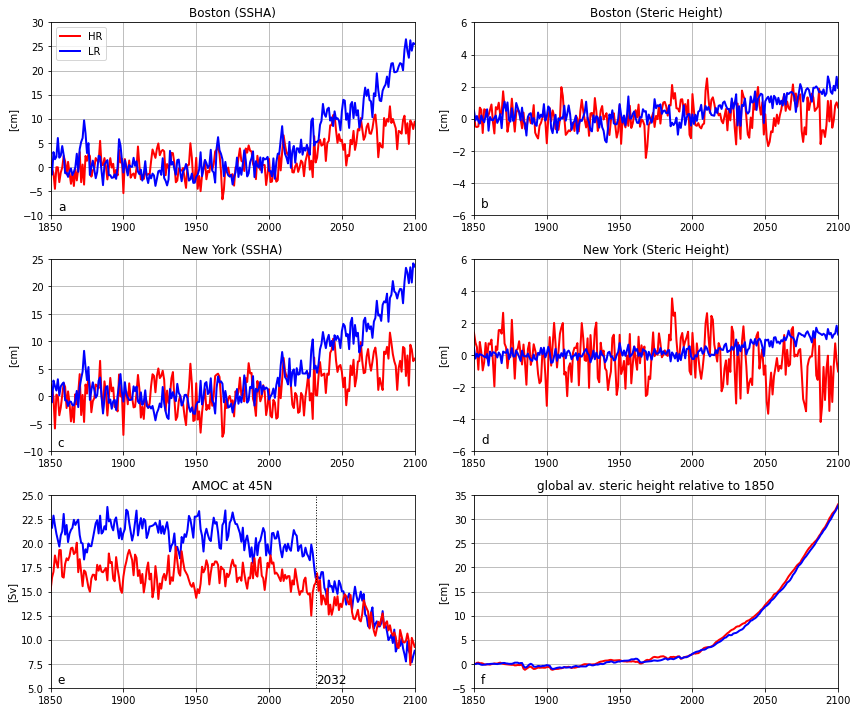

In [23]:
fig1, axs = plt.subplots(3,2,figsize=(12, 10))

# row 1: Boston
axs[0,0].plot(yrs, ssh_yra_TH.isel(nlon_t=0,nlat_t=0), color='r', 
            linewidth=2, label="HR")
axs[0,0].plot(yrs, ssh_yra_TL.isel(nlon_t=0,nlat_t=0), color='b', 
            linewidth=2, label="LR")
axs[0,0].set_xlim([1850,2100])
axs[0,0].set_ylim([-10,30])
# axs[0,0].set_xticks(np.arange(1850, 2100+1,50))
# axs[0,0].set_xticklabels(np.arange(1850, 2100+1,50), fontsize=12)
# axs[0,0].set_yticks(np.arange(-10, 30+1,5))
# axs[0,0].set_yticklabels(np.arange(-10, 30+1,5), fontsize=12)
axs[0,0].grid()
axs[0,0].set_ylabel('[cm]')
axs[0,0].set_title('Boston (SSHA)', fontsize=12)
axs[0,0].text(1855, -9, 'a', fontsize=12)
axs[0,0].legend()

axs[0,1].plot(yrs, h_rst_a_TH.isel(nlon_t=0,nlat_t=0), color='r', 
            linewidth=2, label="HR")
axs[0,1].plot(yrs_TL, h_rst_a_TL.isel(nlon_t=0,nlat_t=0), color='b', 
            linewidth=2, label="LR")
axs[0,1].set_xlim([1850,2100])
axs[0,1].set_ylim([-6,6])
axs[0,1].grid()
axs[0,1].set_ylabel('[cm]')
axs[0,1].set_title('Boston (Steric Height)', fontsize=12)
axs[0,1].text(1855, -5.5, 'b', fontsize=12)


# row 2: New Yok 
axs[1,0].plot(yrs, ssh_yra_TH.isel(nlon_t=1,nlat_t=1), color='r', 
            linewidth=2, label="HR")
axs[1,0].plot(yrs, ssh_yra_TL.isel(nlon_t=1,nlat_t=1), color='b', 
            linewidth=2, label="LR")
axs[1,0].set_xlim([1850,2100])
axs[1,0].set_ylim([-10,25])
axs[1,0].set_ylabel('[cm]')
axs[1,0].set_title('New York (SSHA)', fontsize=12)
axs[1,0].grid()
axs[1,0].text(1855, -9, 'c', fontsize=12)

axs[1,1].plot(yrs, h_rst_a_TH.isel(nlon_t=1,nlat_t=1), color='r', 
            linewidth=2, label="HR")
axs[1,1].plot(yrs_TL, h_rst_a_TL.isel(nlon_t=1,nlat_t=1), color='b', 
            linewidth=2, label="LR")
axs[1,1].set_xlim([1850,2100])
axs[1,1].set_ylim([-6,6])
axs[1,1].grid()
axs[1,1].set_ylabel('[cm]')
axs[1,1].set_title('New York (Steric Height)', fontsize=12)
axs[1,1].text(1855, -5.5, 'd', fontsize=12)

# row 3: MOC
axs[2,0].plot(yrs, MOC45_yr_TL, color='b', linewidth=2, label="TR LR")
axs[2,0].plot(yrs, MOC45_yr_TH, color='r', linewidth=2, label="TR HR")
axs[2,0].plot([2032,2032], [5,25], color='k',linestyle=':', linewidth=1)
axs[2,0].text(2032, 5.5, '2032', fontsize=12)
axs[2,0].set_xlim([1850,2100])
axs[2,0].set_ylim([5,25])
axs[2,0].set_ylabel('[Sv]')
axs[2,0].set_title('AMOC at 45N', fontsize=12)
axs[2,0].grid()
axs[2,0].text(1855, 5.5, 'e', fontsize=12)


axs[2,1].plot(np.arange(1850,2100+1,1), (h_rst_gl_a_fn_TH.values-h_rst_gl_a_CH.values), 
         color='r', linewidth=2, label='TR-CN (HR)')
axs[2,1].plot(np.arange(1850,2100+1,1), (h_rst_gl_a_intp_TL-h_rst_gl_a_intp_CL), 
         color='b', linewidth=2, label='TR-CN (LR)')
axs[2,1].set_xlim([1850,2100])
axs[2,1].set_ylim([-5,35])
axs[2,1].set_ylabel('[cm]')
axs[2,1].set_title('global av. steric height relative to 1850', fontsize=12)
axs[2,1].grid()
axs[2,1].text(1855, -4, 'f', fontsize=12)

fig1.tight_layout()

fig1.savefig(pic1,bbox_inches='tight')

# Appendix 
plot original SSH 

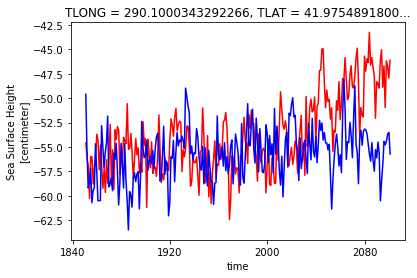

In [23]:
ssh_yr_TH.isel(nlon_t=0,nlat_t=0).plot(color='r')
ssh_yr_CH.isel(nlon_t=0,nlat_t=0).plot(color='b')

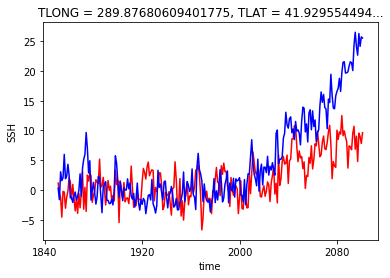

In [24]:
(ssh_yr_TH.isel(nlon_t=0,nlat_t=0) - 
 ssh_yr_TH.isel(nlon_t=0,nlat_t=0).sel(time=slice('1850','1950')).mean('time')).plot(color='r')
(ssh_yr_TL.isel(nlon_t=0,nlat_t=0) - 
ssh_yr_TL.isel(nlon_t=0,nlat_t=0).sel(time=slice('1850','1950')).mean('time')).plot(color='b')

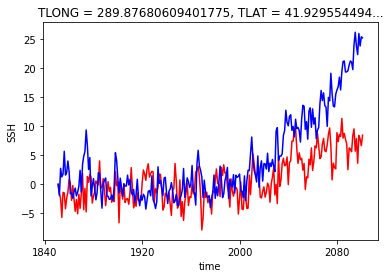

In [25]:
(ssh_yr_TH.isel(nlon_t=0,nlat_t=0) - 
 ssh_yr_TH.isel(nlon_t=0,nlat_t=0).isel(time=0)).plot(color='r')
(ssh_yr_TL.isel(nlon_t=0,nlat_t=0) - 
ssh_yr_TL.isel(nlon_t=0,nlat_t=0).isel(time=0)).plot(color='b')

check MOC coordinates 

In [26]:
ds_MOC_TH.MOC

<xarray.DataArray 'MOC' (time: 3012, transport_reg: 2, moc_comp: 1, moc_z: 63, lat_aux_grid: 395)>
[149907240 values with dtype=float32]
Coordinates:
  * time               (time) object 1850-01-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  (transport_reg) |S256 b'Global Ocean - Marginal Seas' ...
    moc_components     (moc_comp) |S256 b'Eulerian Mean'
  * moc_z              (moc_z) float32 0.0 1e+03 2e+03 ... 5.75e+05 6e+05
  * lat_aux_grid       (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
Dimensions without coordinates: transport_reg, moc_comp
Attributes:
    units:      Sverdrups
    long_name:  Meridional Overturning Circulation

In [27]:
ds_MOC_TH.MOC.sel(lat_aux_grid=45, moc_z=1000*100,
             method='nearest').sel(moc_comp=0, transport_reg=1)

<xarray.DataArray 'MOC' (time: 3012)>
array([11.917703, 15.644326, 16.27959 , ...,  9.647427, 11.984182,  8.552816],
      dtype=float32)
Coordinates:
  * time               (time) object 1850-01-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  |S256 b'Atlantic Ocean + Mediterranean Sea + Labrador ...
    moc_components     |S256 b'Eulerian Mean'
    moc_z              float32 1.041e+05
    lat_aux_grid       float32 44.76
Attributes:
    units:      Sverdrups
    long_name:  Meridional Overturning Circulation